# SGA-PMX Demo

Skrypt przedstawia przykładową implementację algorytmu Simple Genetic Algorithm (SGA) z operatorem PMX i jego zastosowanie do rozwiązywania problemu komiwojażera (ang. Travelling Salesman Problem, TSP). Popularne instancje problemu TSP można znaleźć w bibliotece TSPLib [1]. Skrypt skupia się na rozwiązywaniu instancji BERLIN52, w celu rozwiązywania innych instancji może okazać się konieczna zmiana ustawień parametrów algorytmu, a może też i operatorów ewolucyjnych.

Literatura:

[1] TSPLIB, http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

## Input data

In [20]:
# BERLIN52

n = 52
print('Problem size: %d' % n)

coords = np.array([565.0, 575.0, 25.0, 185.0, 345.0, 750.0, 945.0, 685.0, 845.0, 655.0, 880.0, 660.0, 25.0, 230.0, 525.0, 1000.0, 580.0, 1175.0, 650.0, 1130.0, 1605.0, 620.0, 1220.0, 580.0, 1465.0, 200.0, 1530.0, 5.0, 845.0, 680.0, 725.0, 370.0, 145.0, 665.0, 415.0, 635.0, 510.0, 875.0, 560.0, 365.0, 300.0, 465.0, 520.0, 585.0, 480.0, 415.0, 835.0, 625.0, 975.0, 580.0, 1215.0, 245.0, 1320.0, 315.0, 1250.0, 400.0, 660.0, 180.0, 410.0, 250.0, 420.0, 555.0, 575.0, 665.0, 1150.0, 1160.0, 700.0, 580.0, 685.0, 595.0, 685.0, 610.0, 770.0, 610.0, 795.0, 645.0, 720.0, 635.0, 760.0, 650.0, 475.0, 960.0, 95.0, 260.0, 875.0, 920.0, 700.0, 500.0, 555.0, 815.0, 830.0, 485.0, 1170.0, 65.0, 830.0, 610.0, 605.0, 625.0, 595.0, 360.0, 1340.0, 725.0, 1740.0, 245.0])
coords = coords.reshape(n, 2)

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print('Distance matrix:\n', A)

p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
print('Optimal solution:\n', p)

Problem size: 52
Distance matrix:
 [[   0.          666.10809934  281.11385594 ...  217.08293346
   789.38267019 1220.46097848]
 [ 666.10809934    0.          649.32657423 ...  596.25917184
  1421.55724471 1716.04924172]
 [ 281.11385594  649.32657423    0.         ...  463.24939288
   995.3140208  1483.59361012]
 ...
 [ 217.08293346  596.25917184  463.24939288 ...    0.
   829.60834133 1150.76061803]
 [ 789.38267019 1421.55724471  995.3140208  ...  829.60834133
     0.          624.81997407]
 [1220.46097848 1716.04924172 1483.59361012 ... 1150.76061803
   624.81997407    0.        ]]
Optimal solution:
 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


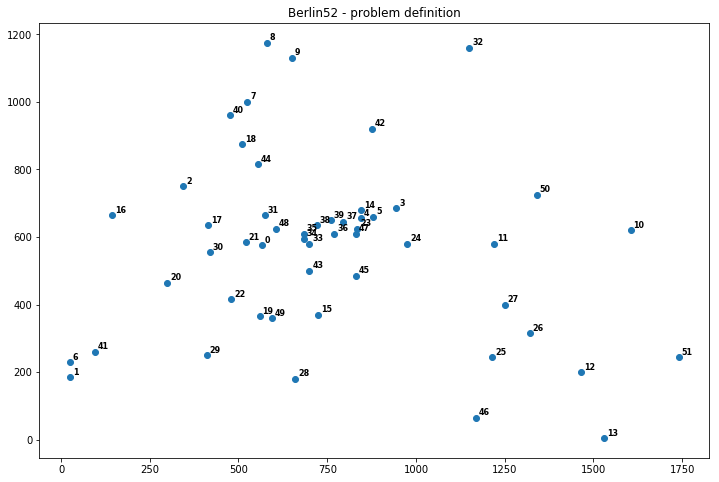

In [21]:
plt.figure(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

plt.title('Berlin52 - problem definition')

plt.show()

<Figure size 864x576 with 0 Axes>

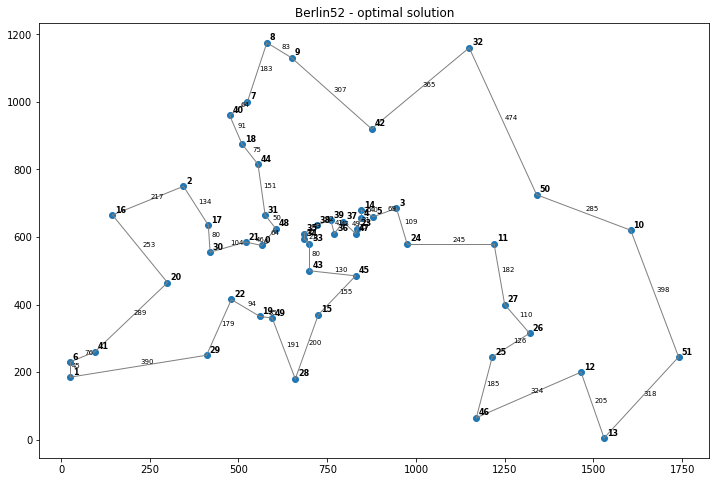

In [22]:
from matplotlib.lines import Line2D

route = p

plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

ax.add_line(Line2D(
    [coords[0, 0], coords[route[0], 0]],
    [coords[0, 1], coords[route[0], 1]],
    linewidth=1, color='gray'))
plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
         (coords[0, 1] + coords[route[0], 1])/2 + 6,
         '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
for i in range(1, len(route)):
    ax.add_line(Line2D(
        [coords[route[i-1], 0], coords[route[i], 0]],
        [coords[route[i-1], 1], coords[route[i], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
             (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
             '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
ax.add_line(Line2D(
    [coords[route[-1], 0], coords[0, 0]],
    [coords[route[-1], 1], coords[0, 1]],
    linewidth=1, color='gray'))
plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
         (coords[route[-1], 1] + coords[0, 1])/2 + 6,
         '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})

plt.title('Berlin52 - optimal solution')

plt.show()

## Objective function

In [23]:
def tsp_objective_function(p):
    s = 0.0
    for i in range(n):
        s += A[p[i-1], p[i]]
    return s

In [24]:
print(tsp_objective_function(p), p)

7544.365901904086 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


## Random Sampling

In [7]:
t0 = time.time()

T = 1000000

permutations = np.empty((T, n), dtype=np.int64)
costs = np.zeros(T)
for i in range(T):
    permutations[i, :] = np.random.permutation(n)
    costs[i] = tsp_objective_function(permutations[i, :])

print(time.time() - t0)

p = permutations[costs.argmin(), :]
print(tsp_objective_function(p), p)

31.18999981880188
21512.44771952199 [46  7  3 14 41 17 42 21 25 27 50 11 36 31 40 28  9 29 15 44 39 45 30 22
 48  2  0 34  8 37 24 23  4 38 47  1 16 33 49 19 20  6 18 32  5 35 43 10
 26 12 51 13]


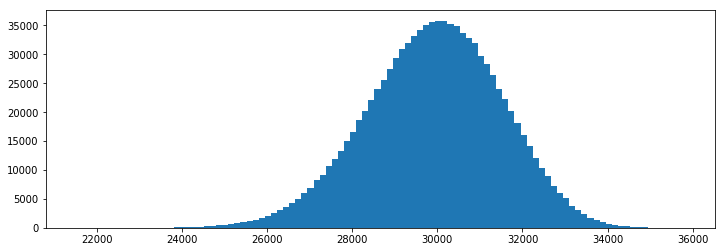

29916.300708918046 1580.3450237402624


In [8]:
plt.figure(figsize=(12,4))
plt.hist(costs, bins=100)
plt.show()

print(costs.mean(), costs.std())

## Simulated Annealing

In [18]:
def run_simulated_annealing(times=10, T=500000, radius=1, alpha=1.0):

    def random_neighbor(p, radius):
        q = p.copy()
        for r in range(radius):
            i, j = np.random.choice(n, 2, replace=False)
            q[i], q[j] = q[j], q[i]
        return q
    
    for i in range(times):
        t0 = time.time()

        p = np.random.permutation(n)
        p_cost = tsp_objective_function(p)
        costs = np.zeros((times, T))
        for t in range(T):
            q = random_neighbor(p, radius)
            q_cost = tsp_objective_function(q)
            if(q_cost < p_cost):
                p, p_cost = q, q_cost
            elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
                p, p_cost = q, q_cost
            costs[i, t] = p_cost

        print(time.time() - t0, costs[i, :].min())
    
        plt.figure(figsize=(12,4))
        plt.ylabel('loss')
        plt.xlabel('step')
        plt.plot(costs[i, :])
        
    plt.show()

27.351999759674072 8841.617015091073
26.339001655578613 9512.614475014465
25.80500102043152 9335.73030887591
26.16003680229187 8319.642762593017
27.331029653549194 9383.68899871081


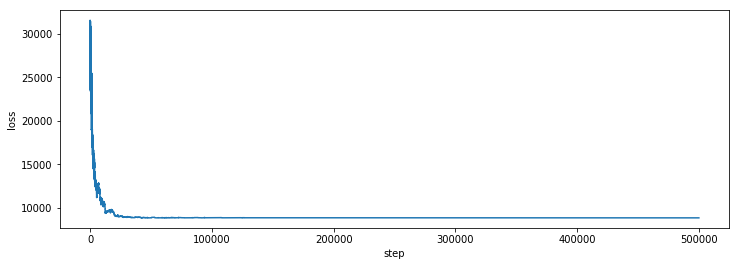

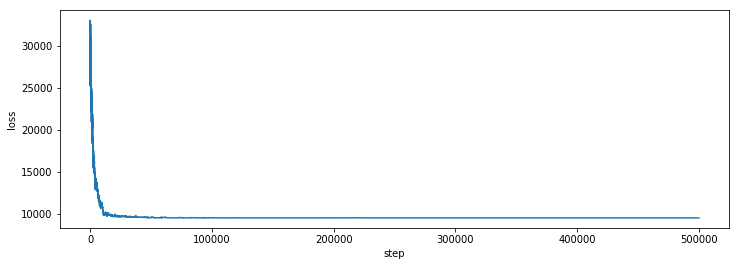

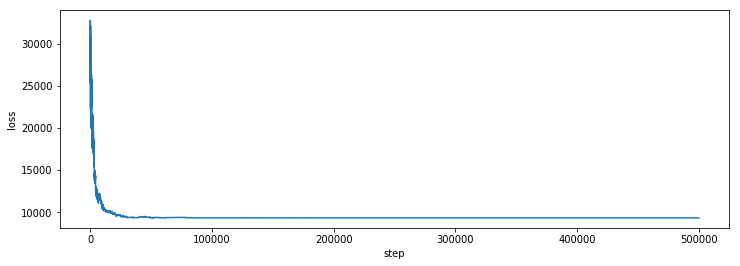

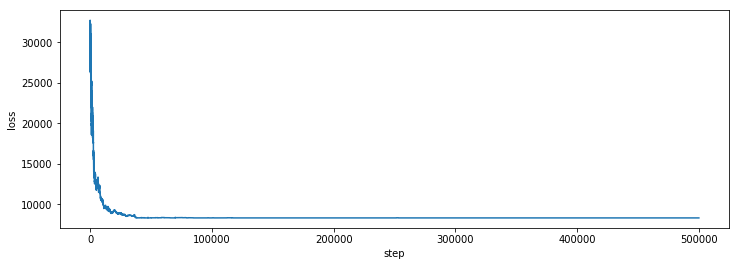

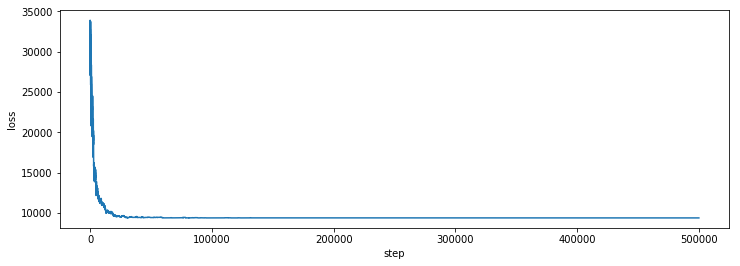

In [26]:
run_simulated_annealing(times=5)

## SGA-PMX

In [25]:
from itertools import chain
def PMX(ind1, ind2):
    n = ind1.shape[0]
    kl = np.random.randint(0, n)
    kh = np.random.randint(0, n)
    if kl > kh:
        kl, kh = kh, kl

    one2two = {ind1[i] : ind2[i] for i in range(kl, kh+1)}
    two2one = {ind2[i] : ind1[i] for i in range(kl, kh+1)}
    ind1_old = ind1.copy()
    for i in chain(range(kl), range(kh+1, n)):
        val = ind2[i]
        while val in one2two:
            val = one2two[val]
        ind1[i] = val
    
    for i in chain(range(kl), range(kh+1, n)):
        val = ind1_old[i]
        while val in two2one:
            val = two2one[val]
        ind2[i] = val
        
    return ind1, ind2

In [26]:
from itertools import chain
def OX(ind1, ind2):
    n = ind1.shape[0]
    a = np.random.choice(n, 2, False)
    l, h = a.min(), a.max()
    
    ind1_old = ind1.copy()
    inherited = set(ind1[l:h+1])
    rotated_list = list(ind2[h+1:]) + list(ind2[:h+1])
    to_offspring = [x for x in rotated_list if x not in inherited]  
    for i, x in zip(chain(range(h+1, n), range(h+1)), to_offspring):
        ind1[i] = x
        
    inherited = set(ind2[l:h+1])
    rotated_list = list(ind1_old[h+1:]) + list(ind1_old[:h+1])
    to_offspring = [x for x in rotated_list if x not in inherited]
    for i, x in zip(chain(range(h+1, n), range(h+1)), to_offspring):
        ind2[i] = x
    
    return ind1, ind2

In [57]:
def get_cycles(ind1, ind2):
    n = ind1.shape[0]
    
    ind1 = list(ind1)
    ind2 = list(ind2)
    
    cycles = [] #cycle desc: [(index, x1, x2)]
    processed = set([])
    for i in range(n):
        if i in processed:
            continue
            
        cycle = [(i, ind1[i], ind2[i])]
        cycle_elements = set([ind1[i]])
        while ind2[i] not in cycle_elements:
            cycle_elements.add(ind2[i])
            i = ind1.index(ind2[i])
            cycle.append((i, ind1[i], ind2[i]))
        cycles.append(cycle)
        processed.update([x[0] for x in cycle])
    return cycles 

def CX(ind1, ind2):
    n = ind1.shape[0]
    
    cycles = get_cycles(ind1, ind2)
    swap = False
    for cycle in cycles:
        for i, x1, x2 in cycle:
            if swap:
                ind1[i], ind2[i] = x2, x1
            else:
                ind1[i], ind2[i] = x1, x2
        swap = not swap
    return ind1, ind2

In [76]:
def PBX(ind1, ind2):
    n = ind1.shape[0]
    
    ind1_old = ind1.copy()
    
    positions = np.random.choice(n, np.random.randint(n), False)
    other_positions = set(range(n)) - set(positions)
    selected = ind1[positions]
    without_dups = [x for x in ind2 if x not in selected]
    for pos, val in zip(other_positions, without_dups):
        ind1[pos] = val
        
    selected = ind2[positions]
    without_dups = [x for x in ind1_old if x not in selected]
    for pos, val in zip(other_positions, without_dups):
        ind2[pos] = val
        
    return ind1, ind2

In [58]:
def reverse_sequence_mutation(p):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    q[i:j+1] = q[i:j+1][::-1]
    return q

In [59]:
def random_transpose_mutation(p):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    q[i], q[j] = q[j], q[i]
    return q

In [60]:
def run_sga(times=5, verbose=False, mutation=reverse_sequence_mutation, crossover=PMX, population_size=500, chromosome_length = n, crossover_probability = 0.95, mutation_probability = 0.25, number_of_iterations = 250):
    number_of_offspring=population_size
    for experiment_counter in range(times):
        time0 = time.time()

        best_objective_value = np.Inf
        best_chromosome = np.zeros((1, chromosome_length))

        # generating an initial population
        current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
        for i in range(population_size):
            current_population[i, :] = np.random.permutation(chromosome_length)

        # evaluating the objective function on the current population
        objective_values = np.zeros(population_size)
        for i in range(population_size):
            objective_values[i] = tsp_objective_function(current_population[i, :])

        min_history = np.empty(number_of_iterations)
        mean_history = np.empty(number_of_iterations)
        max_history = np.empty(number_of_iterations)

        for t in range(number_of_iterations):
            # selecting the parent indices by the roulette wheel method
            fitness_values = objective_values.max() - objective_values
            if fitness_values.sum() > 0:
                fitness_values = fitness_values / fitness_values.sum()
            else:
                fitness_values = np.ones(population_size) / population_size
            parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

            # creating the children population
            children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
            for i in range(int(number_of_offspring/2)):
                if np.random.random() < crossover_probability:
                    children_population[2*i, :], children_population[2*i+1, :] = crossover(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
                else:
                    children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
            if np.mod(number_of_offspring, 2) == 1:
                children_population[-1, :] = current_population[parent_indices[-1], :]

            # mutating the children population
            for i in range(number_of_offspring):
                if np.random.random() < mutation_probability:
                    children_population[i, :] = mutation(children_population[i, :])

            # evaluating the objective function on the children population
            children_objective_values = np.zeros(number_of_offspring)
            for i in range(number_of_offspring):
                children_objective_values[i] = tsp_objective_function(children_population[i, :])

            # replacing the current population by (Mu + Lambda) Replacement
            objective_values = np.hstack([objective_values, children_objective_values])
            current_population = np.vstack([current_population, children_population])

            I = np.argsort(objective_values)
            current_population = current_population[I[:population_size], :]
            objective_values = objective_values[I[:population_size]]

            # recording some statistics
            if best_objective_value < objective_values[0]:
                best_objective_value = objective_values[0]
                best_chromosome = current_population[0, :]
            
            if verbose:
                print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))
            
            max_history[t] = objective_values.max()
            mean_history[t] = objective_values.mean()
            min_history[t] = objective_values.min()
       
        print(f'loss = {min_history.min()}',)
        plt.figure(figsize=(12,4))
        plt.ylabel('loss')
        plt.xlabel('step')
        plt.plot(min_history, label='min loss in population')
        plt.plot(max_history, label='max loss in population')
        plt.plot(mean_history, label='mean loss in population')
        plt.legend()
    plt.show()

### Reverse sequence mutation

loss = 8229.866116164532
loss = 7949.6714681864105
loss = 8561.135879384028
loss = 7986.452560688664
loss = 8105.403393236037


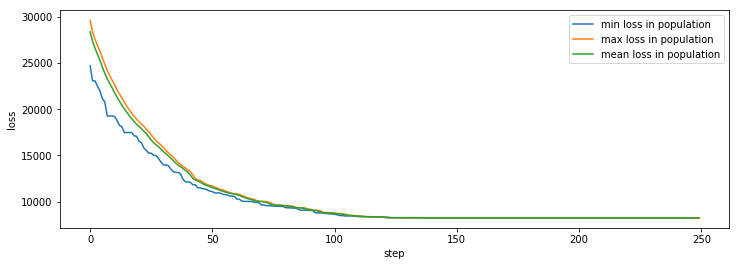

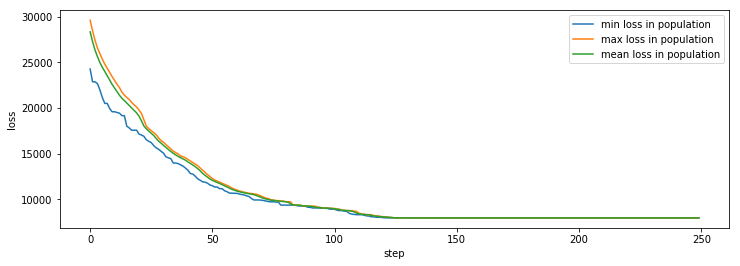

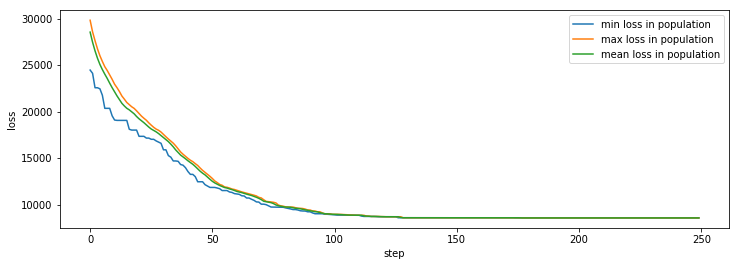

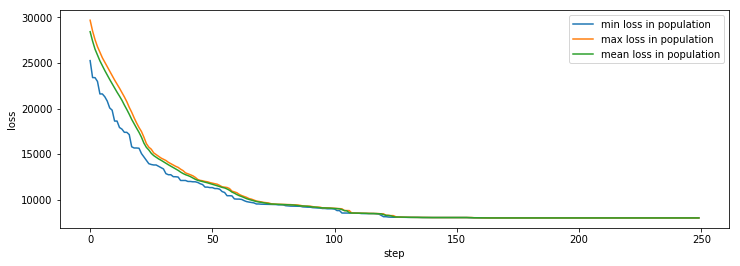

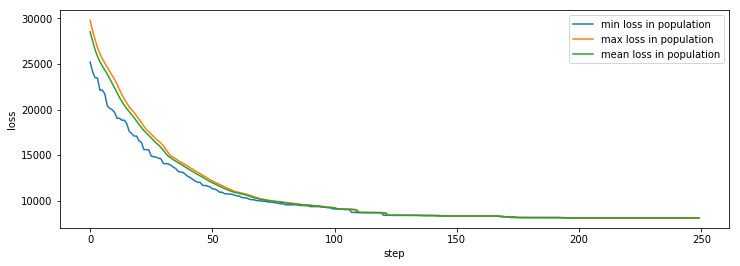

In [25]:
run_sga()

### Random transposition mutation

loss = 10069.170436555809
loss = 9147.064914552246
loss = 10231.162084798396
loss = 8979.88117975722
loss = 10009.29468431


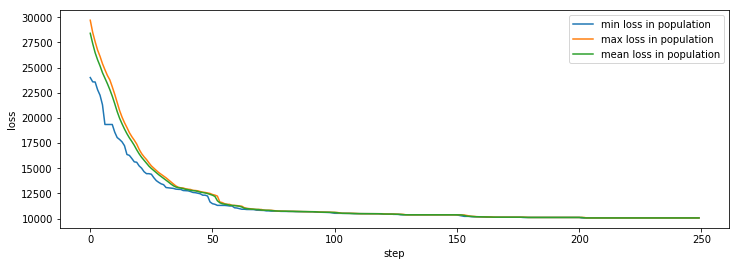

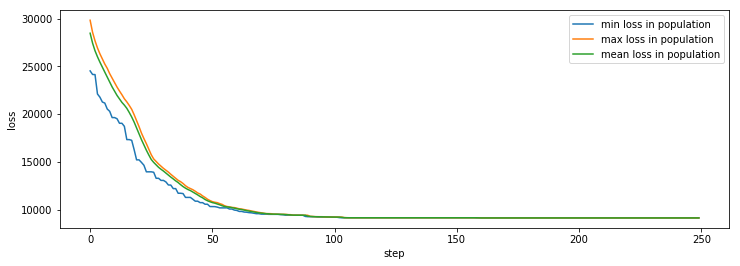

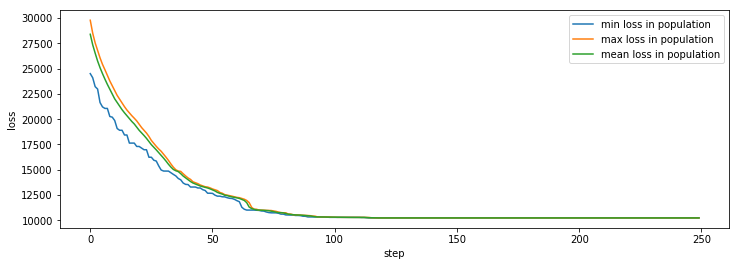

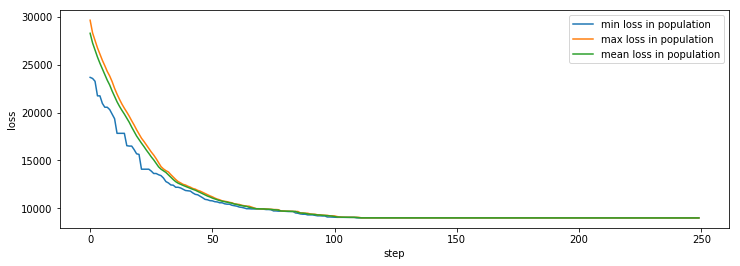

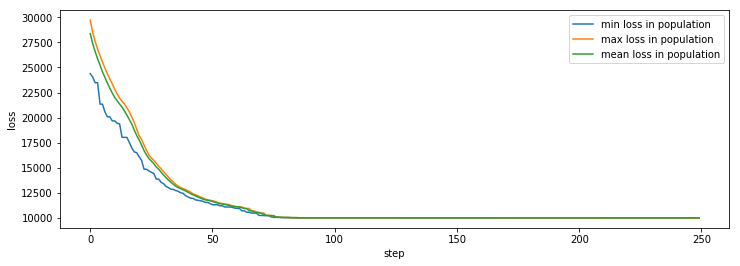

In [29]:
run_sga(mutation=random_transpose_mutation)

### Bayg29

In [50]:
dists_txt = '''97 205 139  86  60 220  65 111 115 227  95  82 225 168 103 266 205 149 120  58 257 152  52 180 136  82  34 145
129 103  71 105 258 154 112  65 204 150  87 176 137 142 204 148 148  49  41 211 226 116 197  89 153 124  74
219 125 175 386 269 134 184 313 201 215 267 248 271 274 236 272 160 151 300 350 239 322  78 276 220  60
167 182 180 162 208  39 102 227  60  86  34  96 129  69  58  60 120 119 192 114 110 192 136 173 173
 51 296 150  42 131 268  88 131 245 201 175 275 218 202 119  50 281 238 131 244  51 166  95  69
279 114  56 150 278  46 133 266 214 162 302 242 203 146  67 300 205 111 238  98 139  52 120
178 328 206 147 308 172 203 165 121 251 216 122 231 249 209 111 169  72 338 144 237 331
169 151 227 133 104 242 182  84 290 230 146 165 121 270  91  48 158 200  39  64 210
172 309  68 169 286 242 208 315 259 240 160  90 322 260 160 281  57 192 107  90
140 195  51 117  72 104 153  93  88  25  85 152 200 104 139 154 134 149 135
320 146  64  68 143 106  88  81 159 219  63 216 187  88 293 191 258 272
174 311 258 196 347 288 243 192 113 345 222 144 274 124 165  71 153
144  86  57 189 128  71  71  82 176 150  56 114 168  83 115 160
 61 165  51  32 105 127 201  36 254 196 136 260 212 258 234
106 110  56  49  91 153  91 197 136  94 225 151 201 205
215 159  64 126 128 190  98  53  78 218  48 127 214
 61 155 157 235  47 305 243 186 282 261 300 252
105 100 176  66 253 183 146 231 203 239 204
113 152 127 150 106  52 235 112 179 221
 79 163 220 119 164 135 152 153 114
236 201  90 195  90 127  84  91
273 226 148 296 238 291 269
112 130 286  74 155 291
130 178  38  75 180
281 120 205 270
213 145  36
 94 217
162'''

n = 29
A = np.zeros((n, n))
A[np.triu_indices(n, k=1)] = np.array([float(x) for x in dists_txt.split()])
A += A.T

print('Distance matrix:\n', A)
p = np.array([1, 28, 6, 12, 9, 26, 3, 29, 5, 21, 2, 20, 10, 4, 15, 18, 14, 17, 22, 11, 19, 25, 7, 23, 8, 27, 16, 13, 24]) - 1
print('Optimal solution:\n', p)
print('loss = ', tsp_objective_function(p))

Distance matrix:
 [[  0.  97. 205. 139.  86.  60. 220.  65. 111. 115. 227.  95.  82. 225.
  168. 103. 266. 205. 149. 120.  58. 257. 152.  52. 180. 136.  82.  34.
  145.]
 [ 97.   0. 129. 103.  71. 105. 258. 154. 112.  65. 204. 150.  87. 176.
  137. 142. 204. 148. 148.  49.  41. 211. 226. 116. 197.  89. 153. 124.
   74.]
 [205. 129.   0. 219. 125. 175. 386. 269. 134. 184. 313. 201. 215. 267.
  248. 271. 274. 236. 272. 160. 151. 300. 350. 239. 322.  78. 276. 220.
   60.]
 [139. 103. 219.   0. 167. 182. 180. 162. 208.  39. 102. 227.  60.  86.
   34.  96. 129.  69.  58.  60. 120. 119. 192. 114. 110. 192. 136. 173.
  173.]
 [ 86.  71. 125. 167.   0.  51. 296. 150.  42. 131. 268.  88. 131. 245.
  201. 175. 275. 218. 202. 119.  50. 281. 238. 131. 244.  51. 166.  95.
   69.]
 [ 60. 105. 175. 182.  51.   0. 279. 114.  56. 150. 278.  46. 133. 266.
  214. 162. 302. 242. 203. 146.  67. 300. 205. 111. 238.  98. 139.  52.
  120.]
 [220. 258. 386. 180. 296. 279.   0. 178. 328. 206. 147. 308. 172. 203

In [36]:
def load_bayg29():
    dists_txt = '''97 205 139  86  60 220  65 111 115 227  95  82 225 168 103 266 205 149 120  58 257 152  52 180 136  82  34 145
    129 103  71 105 258 154 112  65 204 150  87 176 137 142 204 148 148  49  41 211 226 116 197  89 153 124  74
    219 125 175 386 269 134 184 313 201 215 267 248 271 274 236 272 160 151 300 350 239 322  78 276 220  60
    167 182 180 162 208  39 102 227  60  86  34  96 129  69  58  60 120 119 192 114 110 192 136 173 173
     51 296 150  42 131 268  88 131 245 201 175 275 218 202 119  50 281 238 131 244  51 166  95  69
    279 114  56 150 278  46 133 266 214 162 302 242 203 146  67 300 205 111 238  98 139  52 120
    178 328 206 147 308 172 203 165 121 251 216 122 231 249 209 111 169  72 338 144 237 331
    169 151 227 133 104 242 182  84 290 230 146 165 121 270  91  48 158 200  39  64 210
    172 309  68 169 286 242 208 315 259 240 160  90 322 260 160 281  57 192 107  90
    140 195  51 117  72 104 153  93  88  25  85 152 200 104 139 154 134 149 135
    320 146  64  68 143 106  88  81 159 219  63 216 187  88 293 191 258 272
    174 311 258 196 347 288 243 192 113 345 222 144 274 124 165  71 153
    144  86  57 189 128  71  71  82 176 150  56 114 168  83 115 160
     61 165  51  32 105 127 201  36 254 196 136 260 212 258 234
    106 110  56  49  91 153  91 197 136  94 225 151 201 205
    215 159  64 126 128 190  98  53  78 218  48 127 214
     61 155 157 235  47 305 243 186 282 261 300 252
    105 100 176  66 253 183 146 231 203 239 204
    113 152 127 150 106  52 235 112 179 221
     79 163 220 119 164 135 152 153 114
    236 201  90 195  90 127  84  91
    273 226 148 296 238 291 269
    112 130 286  74 155 291
    130 178  38  75 180
    281 120 205 270
    213 145  36
     94 217
    162'''

    n = 29
    A = np.zeros((n, n))
    A[np.triu_indices(n, k=1)] = np.array([float(x) for x in dists_txt.split()])
    A += A.T
    p = np.array([1, 28, 6, 12, 9, 26, 3, 29, 5, 21, 2, 20, 10, 4, 15, 18, 14, 17, 22, 11, 19, 25, 7, 23, 8, 27, 16, 13, 24]) - 1
    return n, A, p

loss = 1610.0
loss = 1651.0
loss = 1680.0
loss = 1623.0
loss = 1643.0
loss = 1626.0
loss = 1620.0
loss = 1630.0
loss = 1642.0
loss = 1658.0


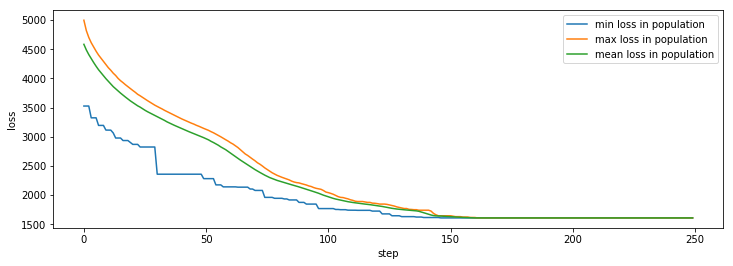

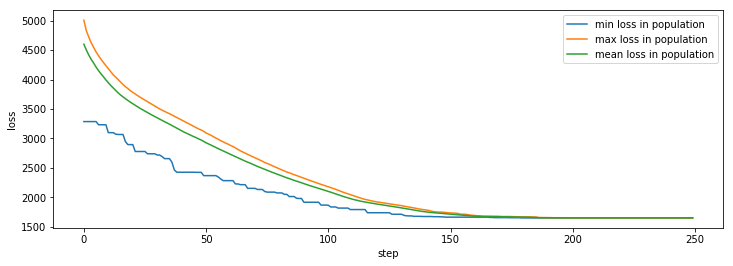

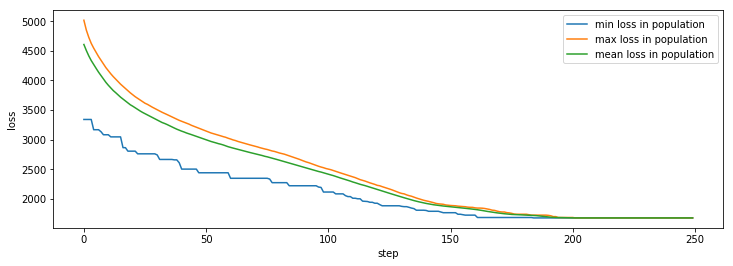

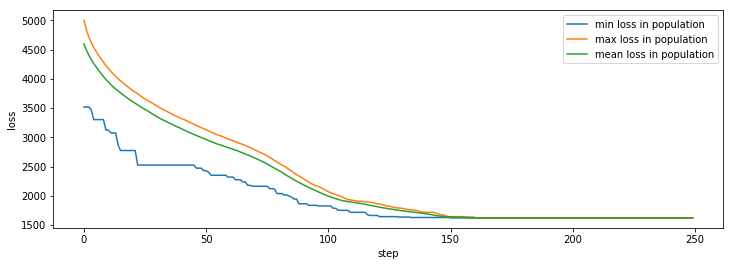

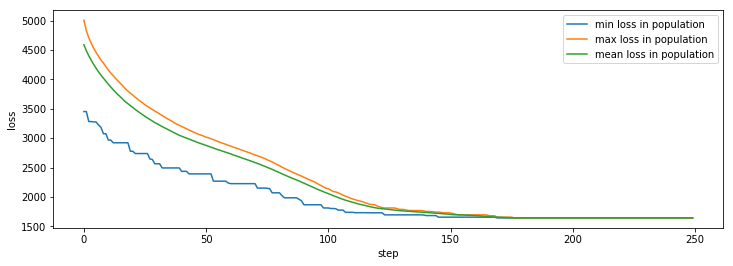

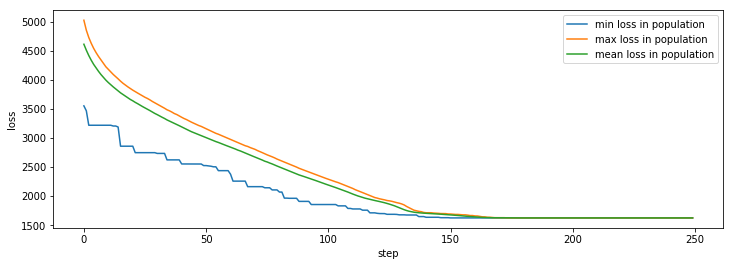

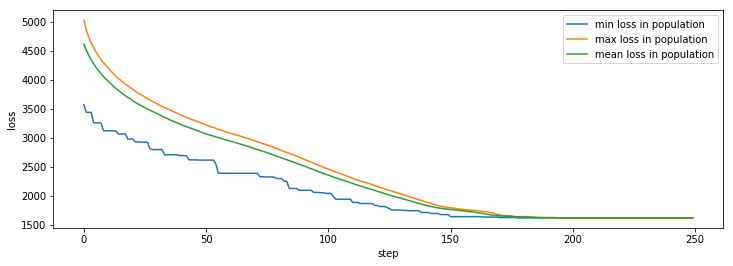

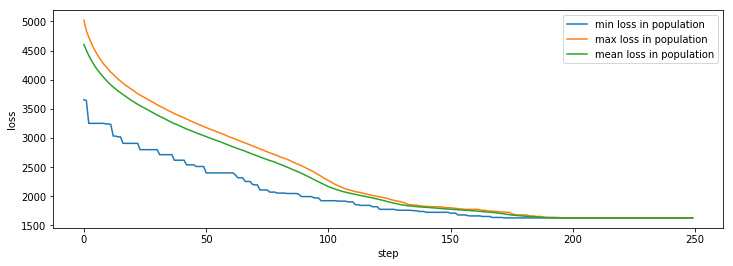

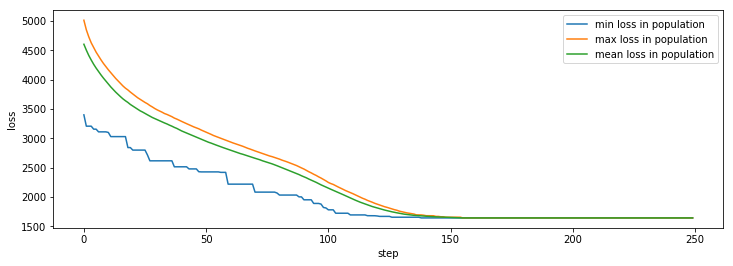

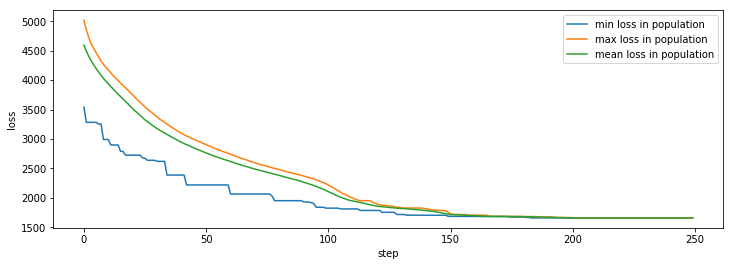

In [64]:
run_sga(mutation_probability=0.4, crossover_probability=0.96, population_size = 2000, times=10)

loss = 1670.0
loss = 1676.0
loss = 1637.0
loss = 1627.0
loss = 1628.0
loss = 1672.0
loss = 1716.0
loss = 1630.0
loss = 1664.0
loss = 1654.0


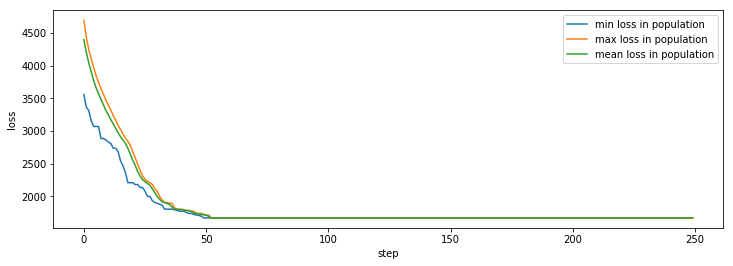

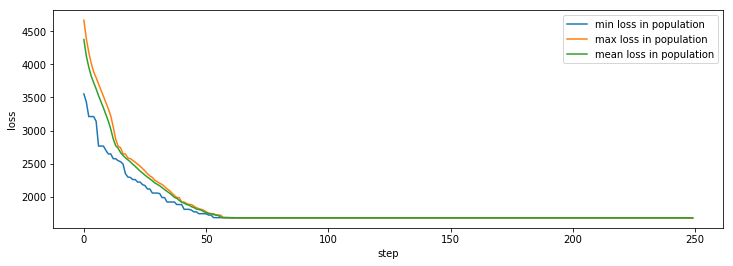

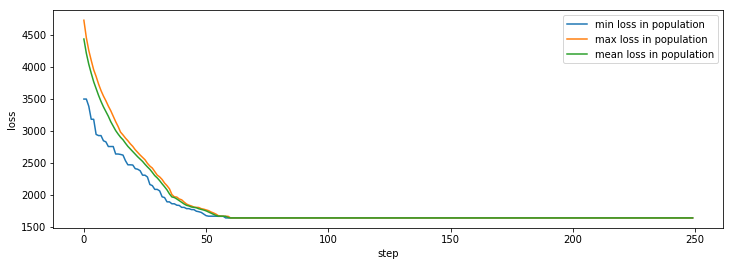

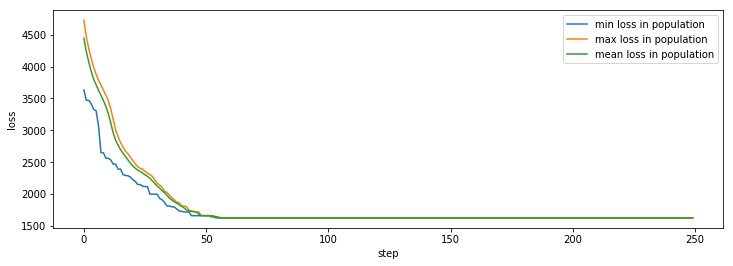

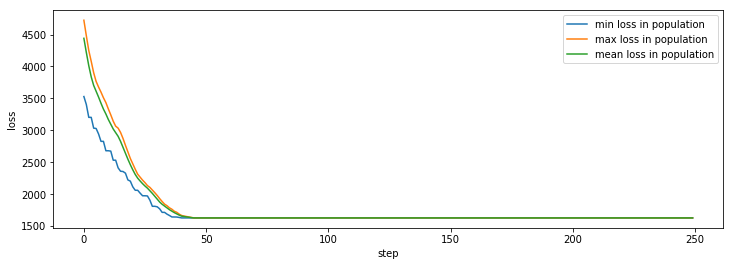

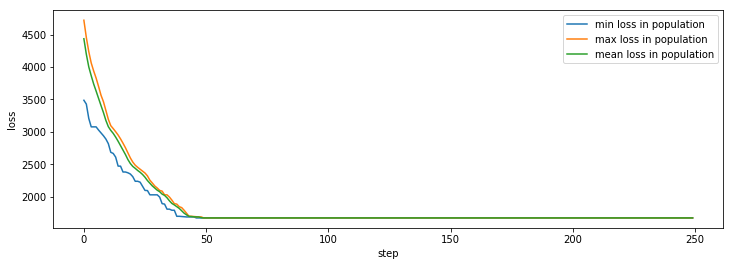

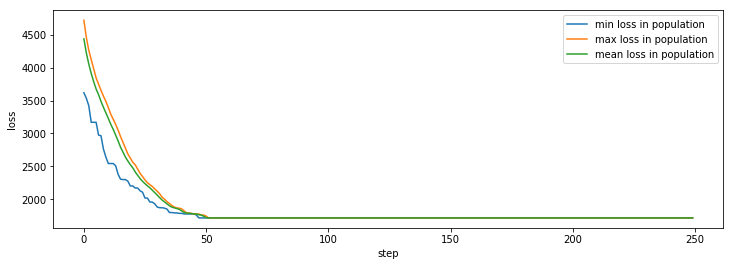

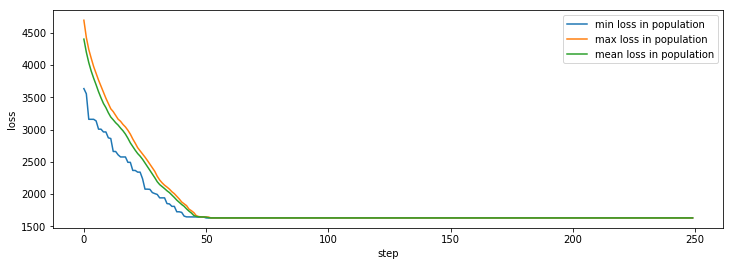

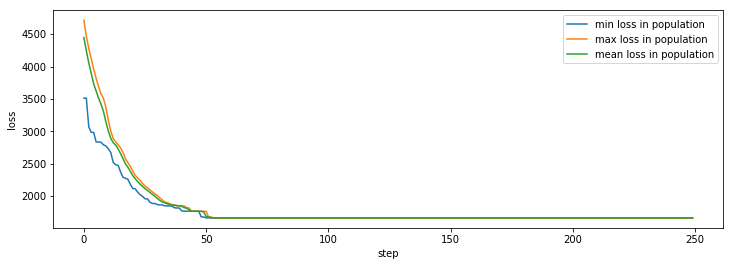

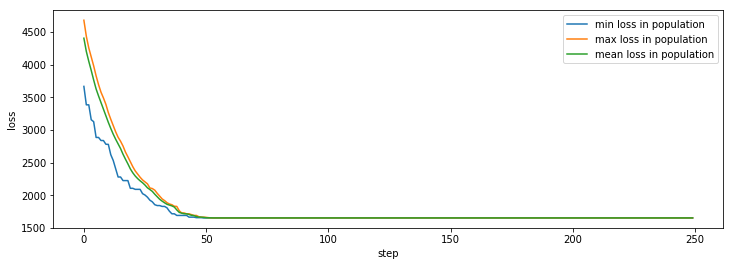

In [65]:
run_sga(times=10)

loss = 1643.0
loss = 1645.0
loss = 1627.0
loss = 1640.0
loss = 1654.0
loss = 1628.0
loss = 1635.0
loss = 1657.0
loss = 1650.0
loss = 1622.0


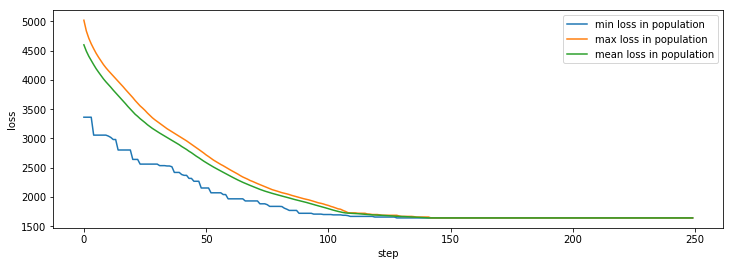

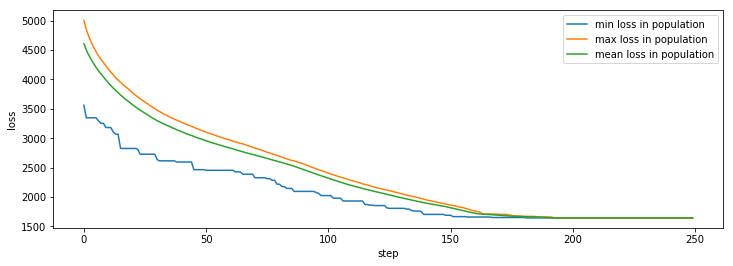

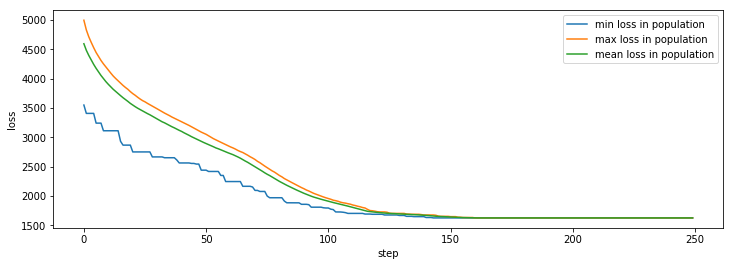

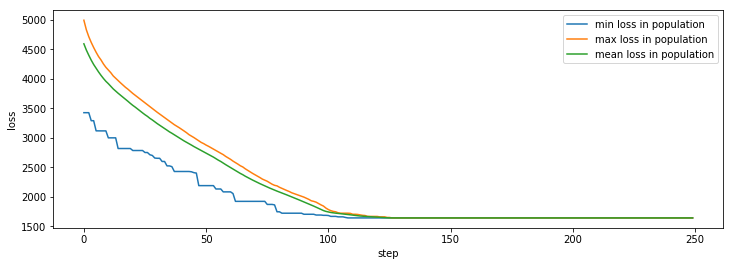

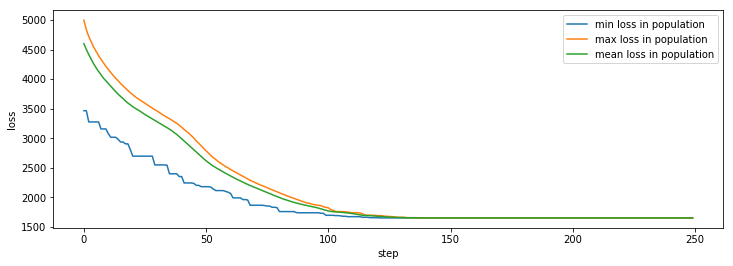

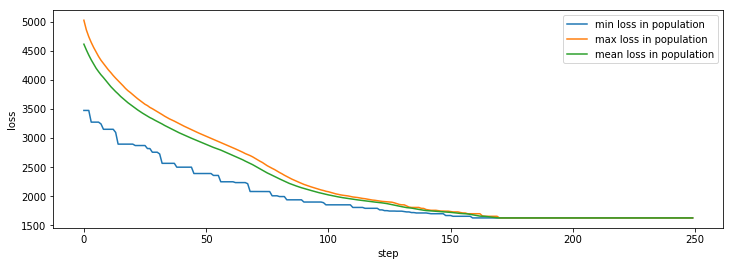

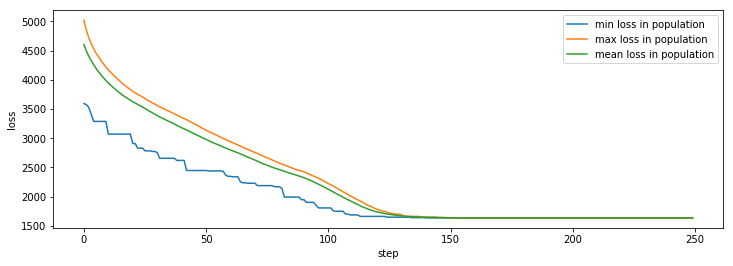

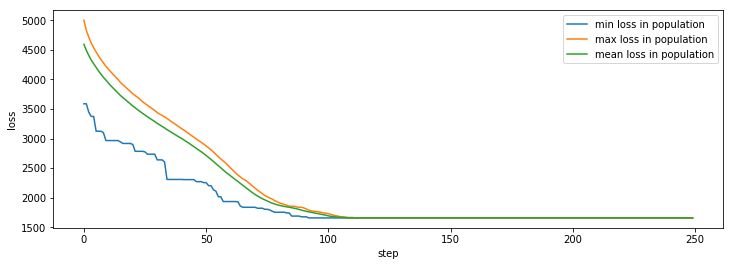

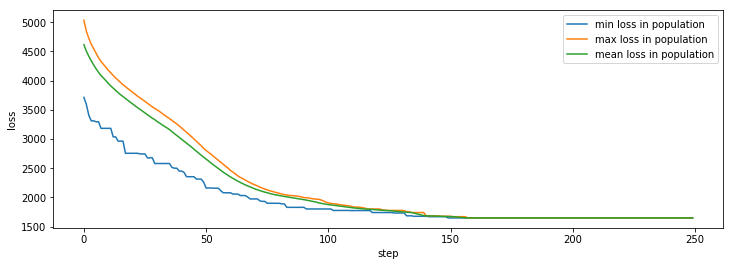

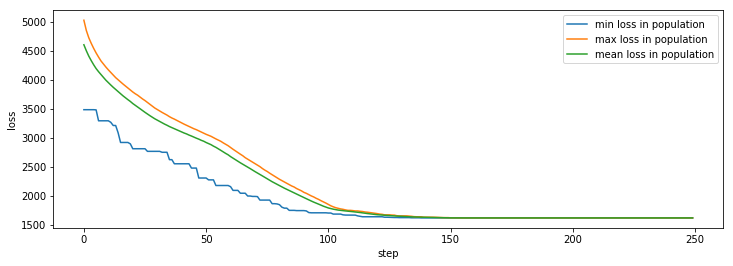

In [67]:
run_sga(times=10, population_size=2000)

### Bays29

In [73]:
dists_txt = '''0 107 241 190 124  80 316  76 152 157 283 133 113 297 228 129 348 276 188 150  65 341 184  67 221 169 108  45 167
 107   0 148 137  88 127 336 183 134  95 254 180 101 234 175 176 265 199 182  67  42 278 271 146 251 105 191 139  79
 241 148   0 374 171 259 509 317 217 232 491 312 280 391 412 349 422 356 355 204 182 435 417 292 424 116 337 273  77
 190 137 374   0 202 234 222 192 248  42 117 287  79 107  38 121 152  86  68  70 137 151 239 135 137 242 165 228 205
 124  88 171 202   0  61 392 202  46 160 319 112 163 322 240 232 314 287 238 155  65 366 300 175 307  57 220 121  97
  80 127 259 234  61   0 386 141  72 167 351  55 157 331 272 226 362 296 232 164  85 375 249 147 301 118 188  60 185
 316 336 509 222 392 386   0 233 438 254 202 439 235 254 210 187 313 266 154 282 321 298 168 249  95 437 190 314 435
  76 183 317 192 202 141 233   0 213 188 272 193 131 302 233  98 344 289 177 216 141 346 108  57 190 245  43  81 243
 152 134 217 248  46  72 438 213   0 206 365  89 209 368 286 278 360 333 284 201 111 412 321 221 353  72 266 132 111
 157  95 232  42 160 167 254 188 206   0 159 220  57 149  80 132 193 127 100  28  95 193 241 131 169 200 161 189 163
 283 254 491 117 319 351 202 272 365 159   0 404 176 106  79 161 165 141  95 187 254 103 279 215 117 359 216 308 322
 133 180 312 287 112  55 439 193  89 220 404   0 210 384 325 279 415 349 285 217 138 428 310 200 354 169 241 112 238
 113 101 280  79 163 157 235 131 209  57 176 210   0 186 117  75 231 165  81  85  92 230 184  74 150 208 104 158 206
 297 234 391 107 322 331 254 302 368 149 106 384 186   0  69 191  59  35 125 167 255  44 309 245 169 327 246 335 288
 228 175 412  38 240 272 210 233 286  80  79 325 117  69   0 122 122  56  56 108 175 113 240 176 125 280 177 266 243
 129 176 349 121 232 226 187  98 278 132 161 279  75 191 122   0 244 178  66 160 161 235 118  62  92 277  55 155 275
 348 265 422 152 314 362 313 344 360 193 165 415 231  59 122 244   0  66 178 198 286  77 362 287 228 358 299 380 319
 276 199 356  86 287 296 266 289 333 127 141 349 165  35  56 178  66   0 112 132 220  79 296 232 181 292 233 314 253
 188 182 355  68 238 232 154 177 284 100  95 285  81 125  56  66 178 112   0 128 167 169 179 120  69 283 121 213 281
 150  67 204  70 155 164 282 216 201  28 187 217  85 167 108 160 198 132 128   0  88 211 269 159 197 172 189 182 135
  65  42 182 137  65  85 321 141 111  95 254 138  92 255 175 161 286 220 167  88   0 299 229 104 236 110 149  97 108
 341 278 435 151 366 375 298 346 412 193 103 428 230  44 113 235  77  79 169 211 299   0 353 289 213 371 290 379 332
 184 271 417 239 300 249 168 108 321 241 279 310 184 309 240 118 362 296 179 269 229 353   0 121 162 345  80 189 342
  67 146 292 135 175 147 249  57 221 131 215 200  74 245 176  62 287 232 120 159 104 289 121   0 154 220  41  93 218
 221 251 424 137 307 301  95 190 353 169 117 354 150 169 125  92 228 181  69 197 236 213 162 154   0 352 147 247 350
 169 105 116 242  57 118 437 245  72 200 359 169 208 327 280 277 358 292 283 172 110 371 345 220 352   0 265 178  39
 108 191 337 165 220 188 190  43 266 161 216 241 104 246 177  55 299 233 121 189 149 290  80  41 147 265   0 124 263
  45 139 273 228 121  60 314  81 132 189 308 112 158 335 266 155 380 314 213 182  97 379 189  93 247 178 124   0 199
 167  79  77 205  97 185 435 243 111 163 322 238 206 288 243 275 319 253 281 135 108 332 342 218 350  39 263 199   0'''

n = 29
A = np.fromstring(dists_txt, sep=' ').reshape((n, n))

print('Distance matrix:\n', A)
p = np.array([1, 28, 6, 12, 9, 5, 26, 29, 3, 2, 20, 10, 4, 15, 18, 17, 14, 22, 11, 19, 25, 7, 23, 27, 8, 24, 16, 13, 21]) - 1
print('Optimal solution:\n', p)
print('loss = ', tsp_objective_function(p))

Distance matrix:
 [[  0. 107. 241. 190. 124.  80. 316.  76. 152. 157. 283. 133. 113. 297.
  228. 129. 348. 276. 188. 150.  65. 341. 184.  67. 221. 169. 108.  45.
  167.]
 [107.   0. 148. 137.  88. 127. 336. 183. 134.  95. 254. 180. 101. 234.
  175. 176. 265. 199. 182.  67.  42. 278. 271. 146. 251. 105. 191. 139.
   79.]
 [241. 148.   0. 374. 171. 259. 509. 317. 217. 232. 491. 312. 280. 391.
  412. 349. 422. 356. 355. 204. 182. 435. 417. 292. 424. 116. 337. 273.
   77.]
 [190. 137. 374.   0. 202. 234. 222. 192. 248.  42. 117. 287.  79. 107.
   38. 121. 152.  86.  68.  70. 137. 151. 239. 135. 137. 242. 165. 228.
  205.]
 [124.  88. 171. 202.   0.  61. 392. 202.  46. 160. 319. 112. 163. 322.
  240. 232. 314. 287. 238. 155.  65. 366. 300. 175. 307.  57. 220. 121.
   97.]
 [ 80. 127. 259. 234.  61.   0. 386. 141.  72. 167. 351.  55. 157. 331.
  272. 226. 362. 296. 232. 164.  85. 375. 249. 147. 301. 118. 188.  60.
  185.]
 [316. 336. 509. 222. 392. 386.   0. 233. 438. 254. 202. 439. 235. 254

loss = 2201.0
loss = 2261.0
loss = 2028.0
loss = 2086.0
loss = 2078.0
loss = 2132.0
loss = 2074.0
loss = 2058.0
loss = 2068.0
loss = 2039.0


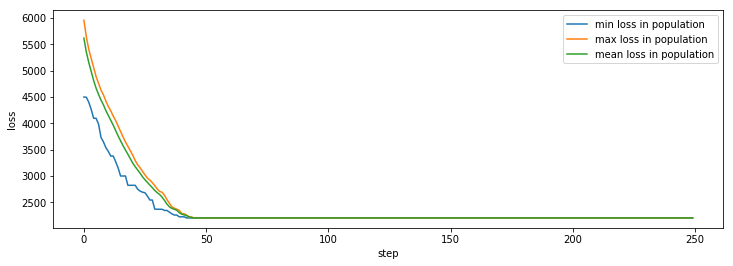

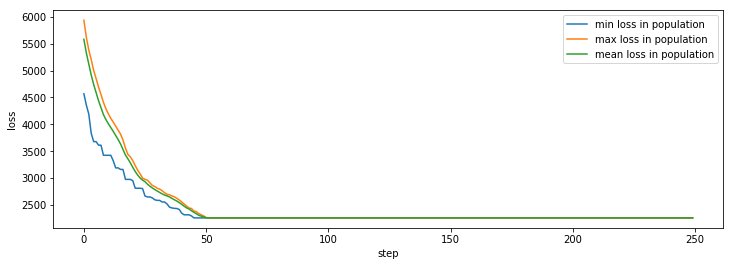

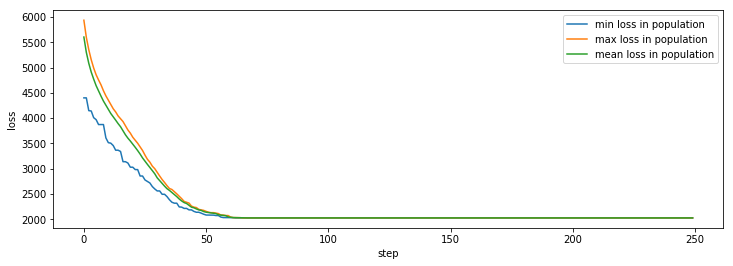

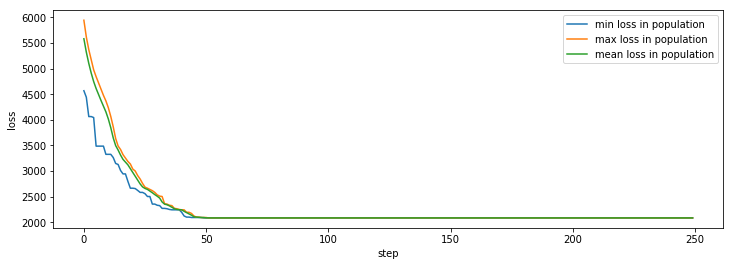

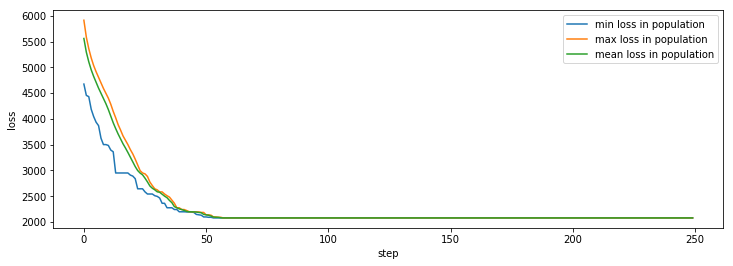

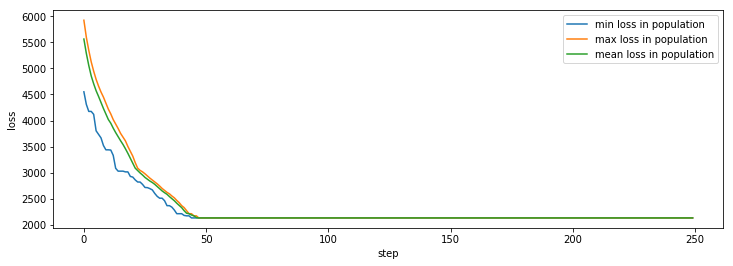

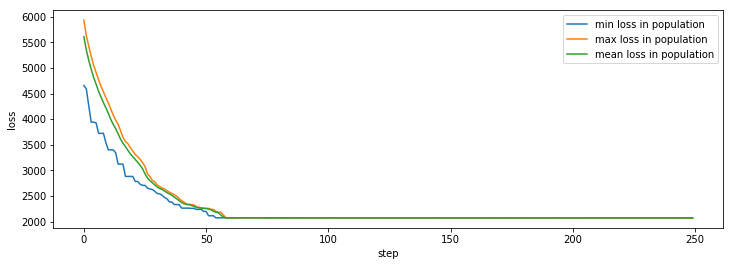

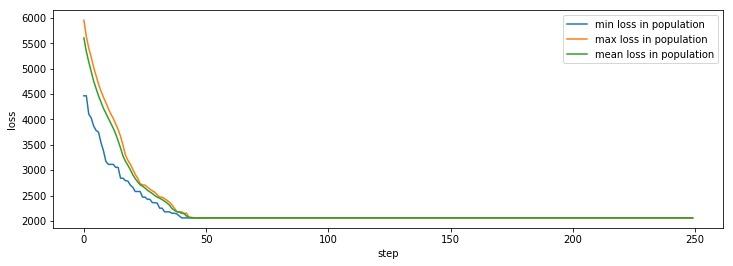

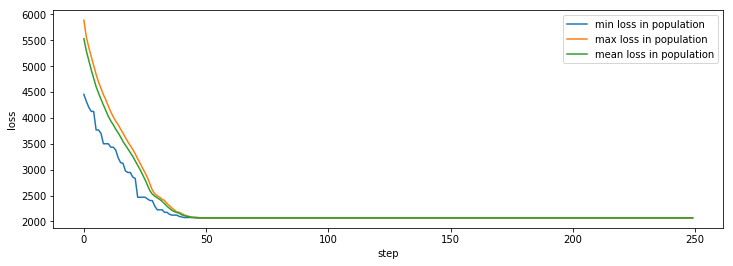

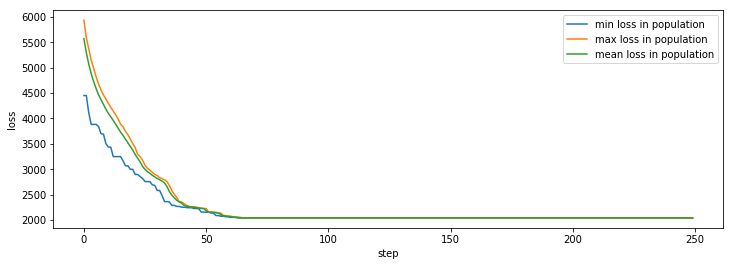

In [74]:
run_sga(times=10)

loss = 2028.0
loss = 2117.0
loss = 2060.0
loss = 2052.0
loss = 2067.0
loss = 2067.0
loss = 2026.0
loss = 2227.0
loss = 2033.0
loss = 2123.0


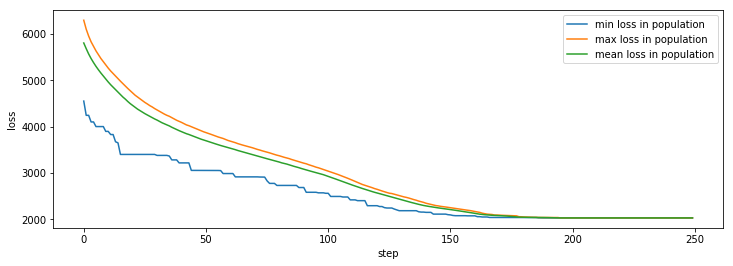

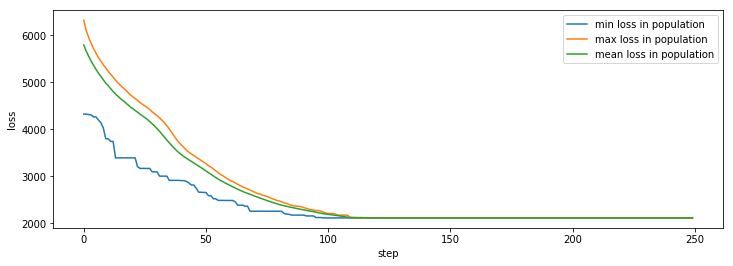

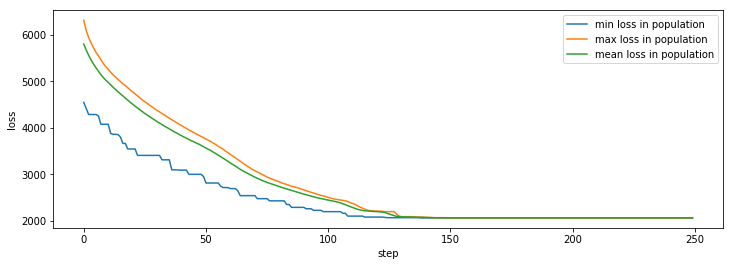

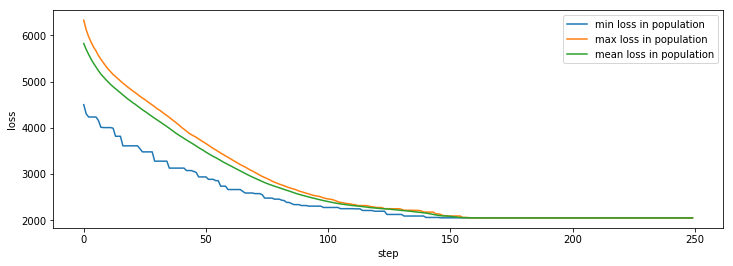

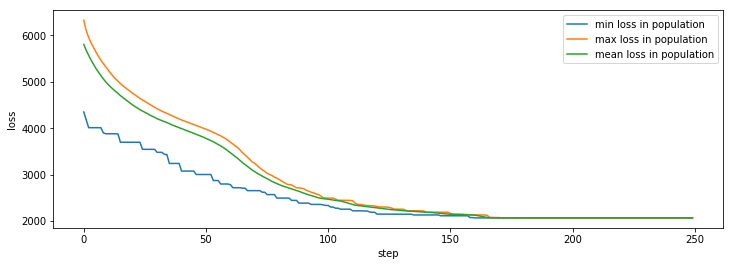

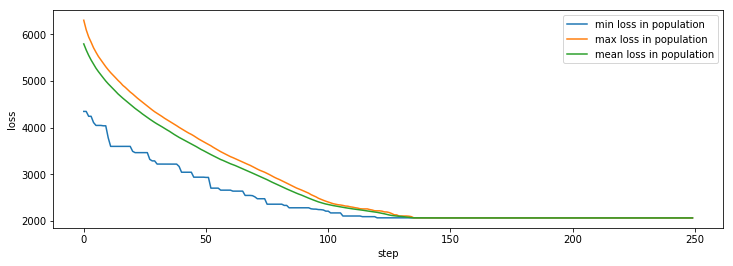

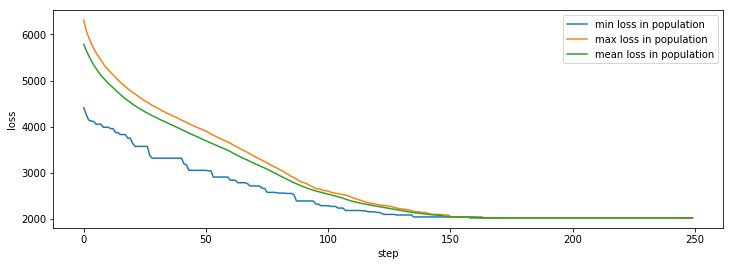

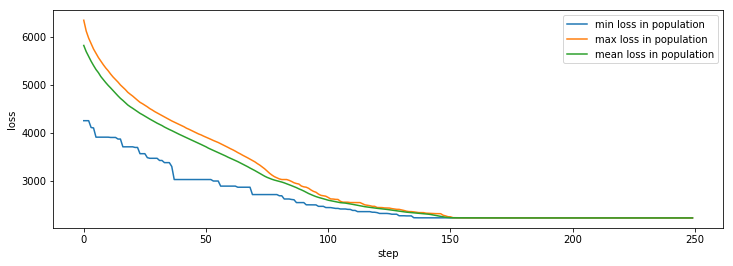

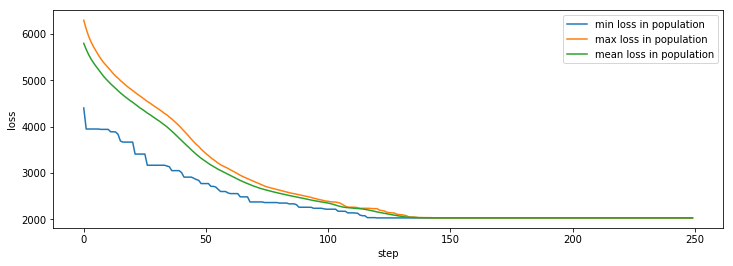

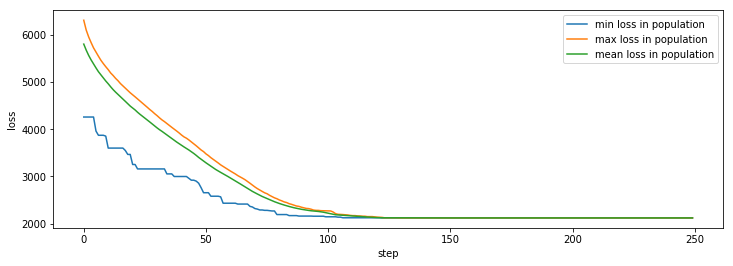

In [75]:
run_sga(times=10, population_size=2000)

loss = 2071.0
loss = 2026.0
loss = 2020.0
loss = 2034.0
loss = 2098.0
loss = 2026.0
loss = 2045.0
loss = 2052.0
loss = 2028.0
loss = 2034.0


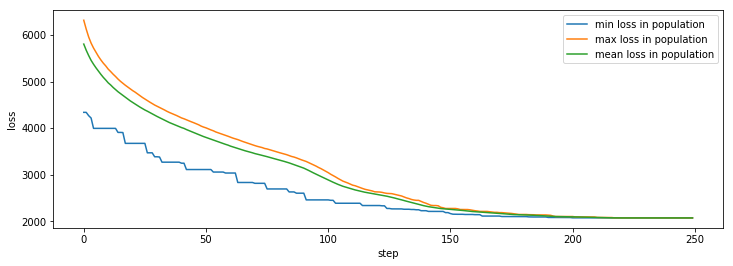

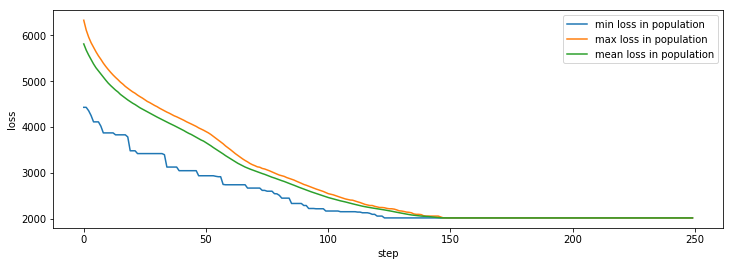

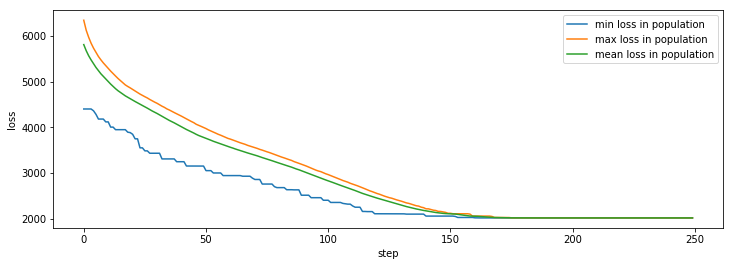

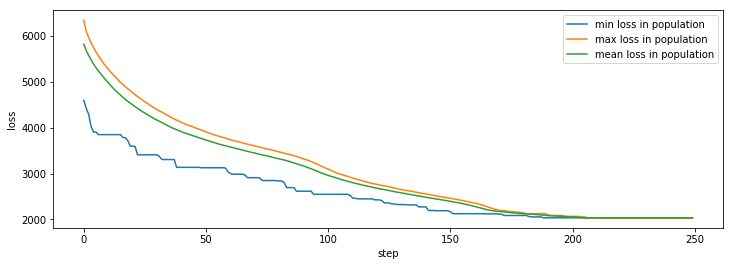

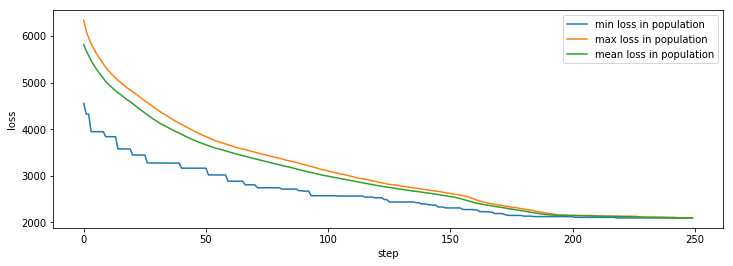

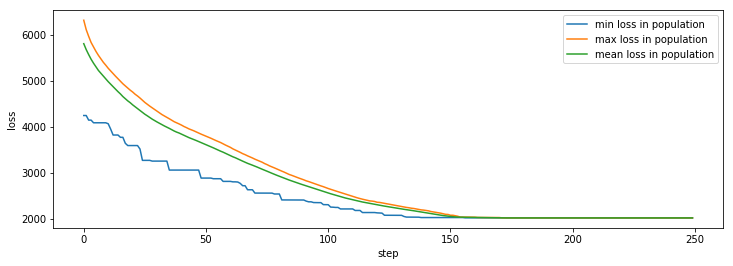

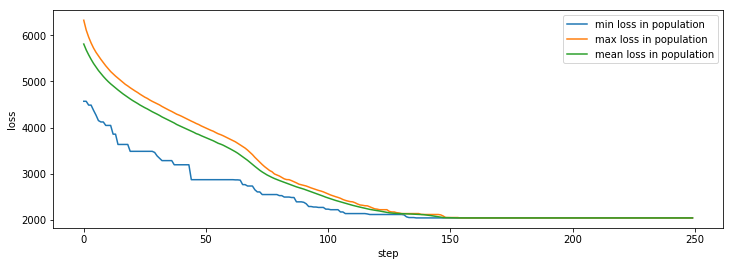

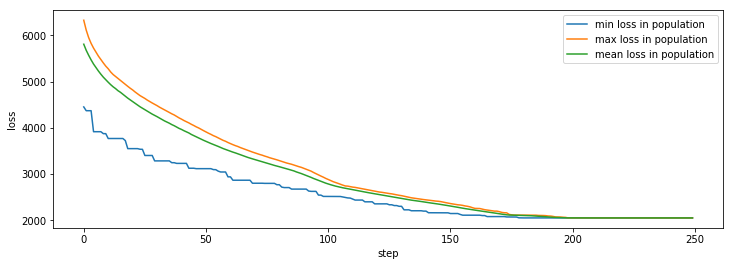

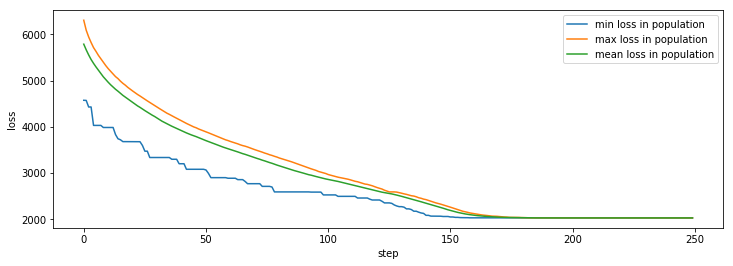

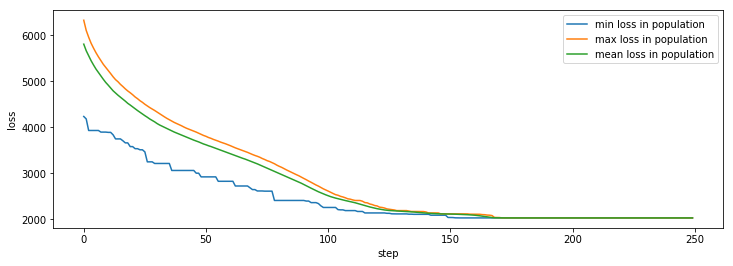

In [76]:
run_sga(times=10, population_size=2000, mutation_probability=0.4)

### KroA100

In [95]:
coords_txt = '''1380 939
2848 96
3510 1671
457 334
3888 666
984 965
2721 1482
1286 525
2716 1432
738 1325
1251 1832
2728 1698
3815 169
3683 1533
1247 1945
123 862
1234 1946
252 1240
611 673
2576 1676
928 1700
53 857
1807 1711
274 1420
2574 946
178 24
2678 1825
1795 962
3384 1498
3520 1079
1256 61
1424 1728
3913 192
3085 1528
2573 1969
463 1670
3875 598
298 1513
3479 821
2542 236
3955 1743
1323 280
3447 1830
2936 337
1621 1830
3373 1646
1393 1368
3874 1318
938 955
3022 474
2482 1183
3854 923
376 825
2519 135
2945 1622
953 268
2628 1479
2097 981
890 1846
2139 1806
2421 1007
2290 1810
1115 1052
2588 302
327 265
241 341
1917 687
2991 792
2573 599
19 674
3911 1673
872 1559
2863 558
929 1766
839 620
3893 102
2178 1619
3822 899
378 1048
1178 100
2599 901
3416 143
2961 1605
611 1384
3113 885
2597 1830
2586 1286
161 906
1429 134
742 1025
1625 1651
1187 706
1787 1009
22 987
3640 43
3756 882
776 392
1724 1642
198 1810
3950 1558'''

n = 100
coords = np.fromstring(coords_txt, sep=' ')
coords = coords.reshape((n, 2))

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print('Distance matrix:\n', A)

p = '''
1
47
93
28
67
58
61
51
87
25
81
69
64
40
54
2
44
50
73
68
85
82
95
13
76
33
37
5
52
78
96
39
30
48
100
41
71
14
3
43
46
29
34
83
55
7
9
57
20
12
27
86
35
62
60
77
23
98
91
45
32
11
15
17
59
74
21
72
10
84
36
99
38
24
18
79
53
88
16
94
22
70
66
26
65
4
97
56
80
31
89
42
8
92
75
19
90
49
6
63'''
p = np.fromstring(p, sep=' ', dtype='int') - 1
print('Optimal solution:\n', p)
print('loss = ', tsp_objective_function(p))

Distance matrix:
 [[   0.         1692.82987923 2252.27085405 ...  782.65254104
  1468.2523625  2643.49408927]
 [1692.82987923    0.         1708.46978317 ... 1911.41099714
  3155.99366286 1830.8052873 ]
 [2252.27085405 1708.46978317    0.         ... 1786.23542681
  3314.91553437  454.27854891]
 ...
 [ 782.65254104 1911.41099714 1786.23542681 ...    0.
  1535.21985396 2227.58434184]
 [1468.2523625  3155.99366286 3314.91553437 ... 1535.21985396
     0.         3760.45316418]
 [2643.49408927 1830.8052873   454.27854891 ... 2227.58434184
  3760.45316418    0.        ]]
Optimal solution:
 [ 0 46 92 27 66 57 60 50 86 24 80 68 63 39 53  1 43 49 72 67 84 81 94 12
 75 32 36  4 51 77 95 38 29 47 99 40 70 13  2 42 45 28 33 82 54  6  8 56
 19 11 26 85 34 61 59 76 22 97 90 44 31 10 14 16 58 73 20 71  9 83 35 98
 37 23 17 78 52 87 15 93 21 69 65 25 64  3 96 55 79 30 88 41  7 91 74 18
 89 48  5 62]
loss =  21285.44318157108


loss = 22981.86497163081
loss = 24053.573763910248
loss = 23141.52686808565
loss = 24171.951626847258
loss = 23958.83461862547
loss = 23204.776906456795
loss = 23168.50562575688
loss = 22939.500648792233
loss = 22709.30252373406
loss = 23894.33374733282


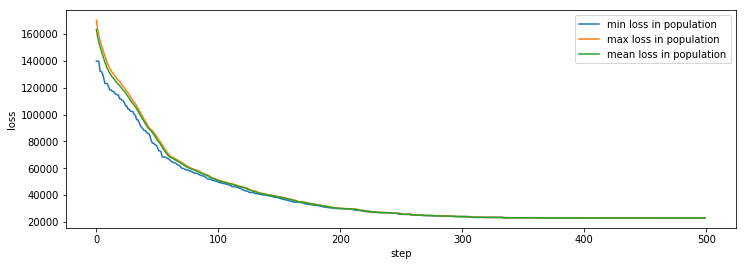

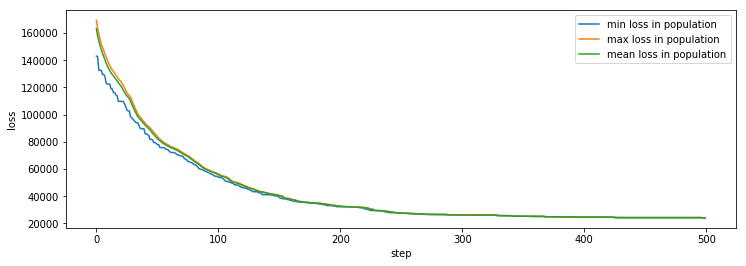

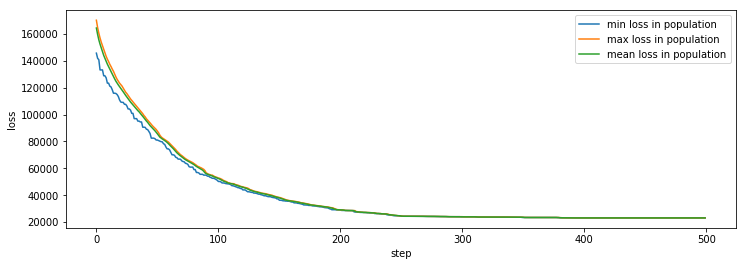

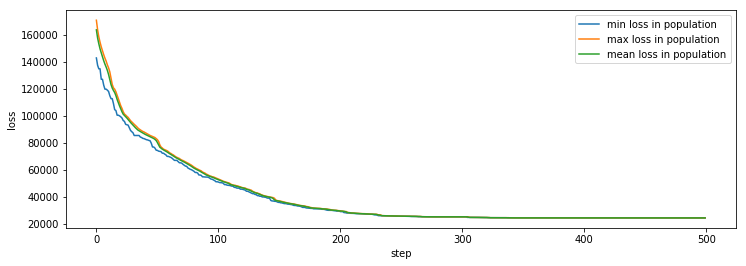

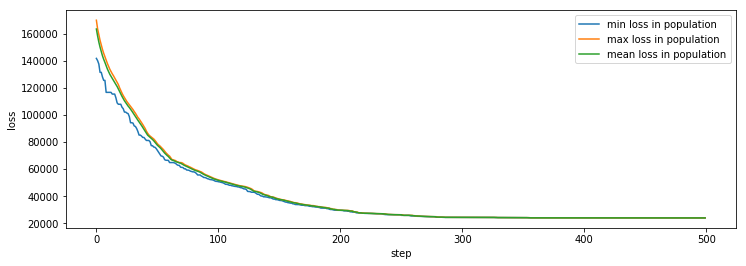

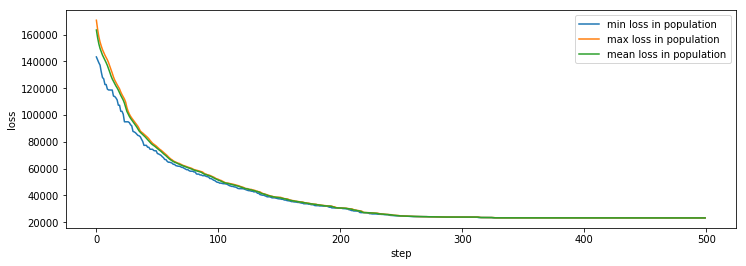

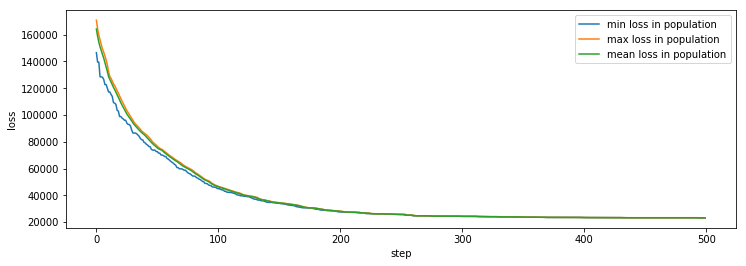

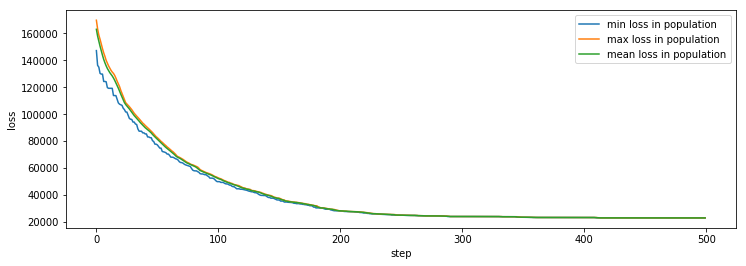

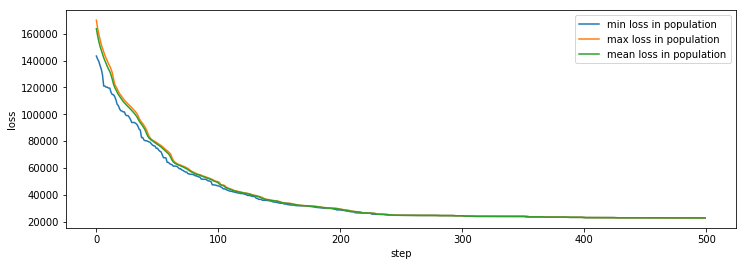

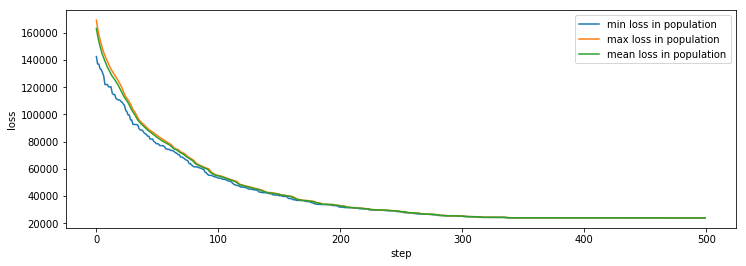

In [98]:
run_sga(times=10, chromosome_length = 100, number_of_iterations = 500)

loss = 22898.04570722558
loss = 22810.107831724246
loss = 22632.169091704076
loss = 23456.319150944957
loss = 22854.42156095582
loss = 23177.81135396102
loss = 22394.951896882034
loss = 22885.863913128098
loss = 22514.184899967735
loss = 24810.687144286916


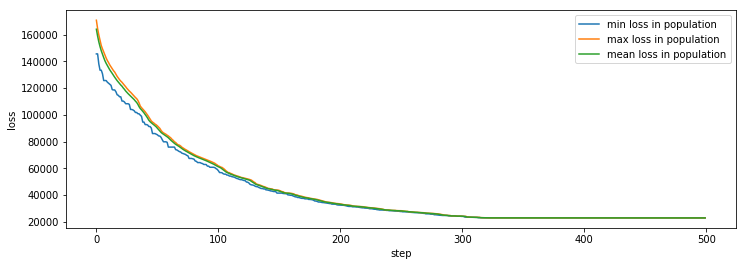

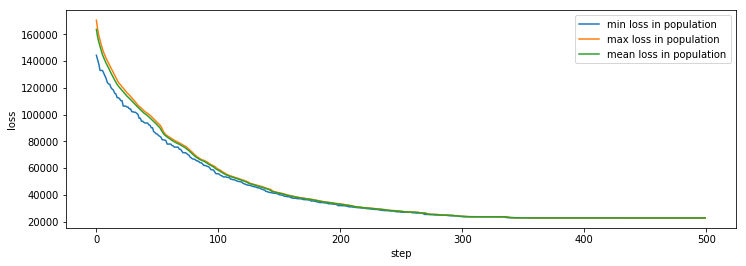

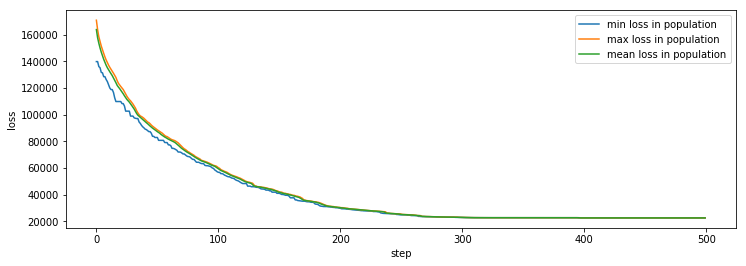

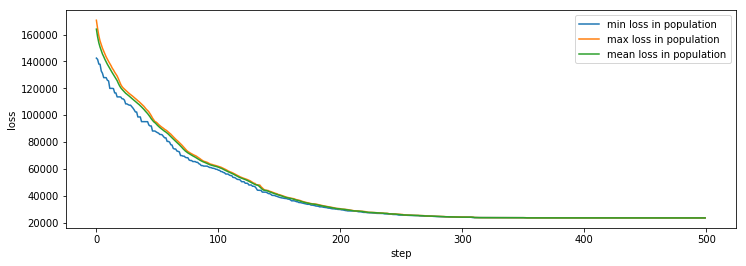

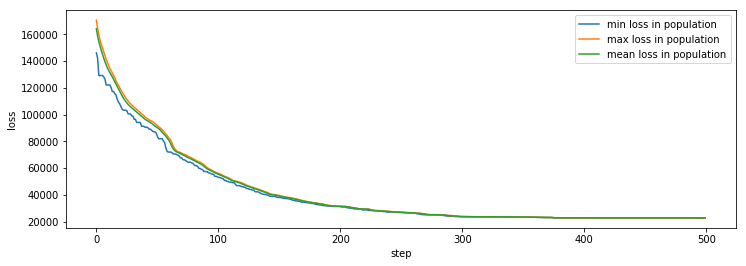

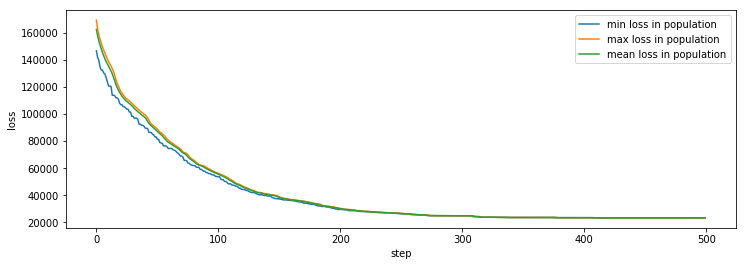

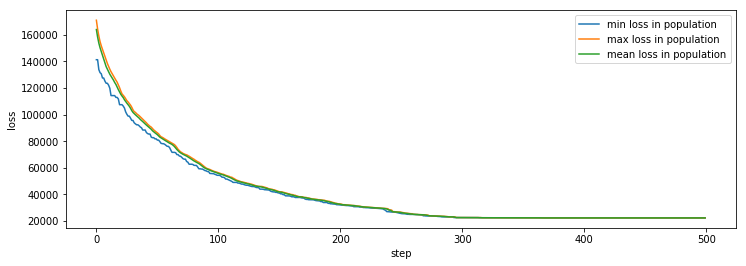

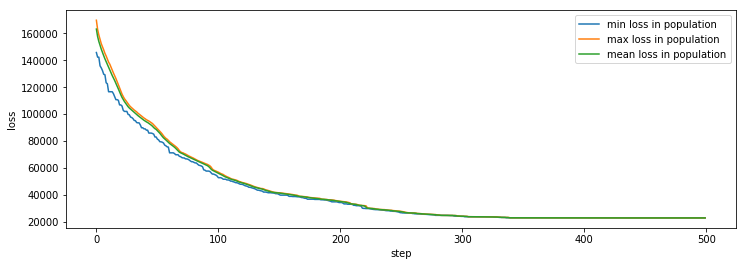

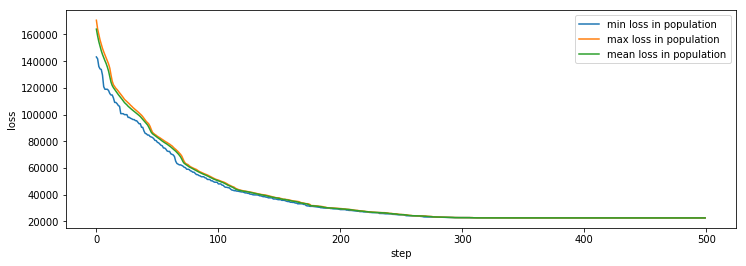

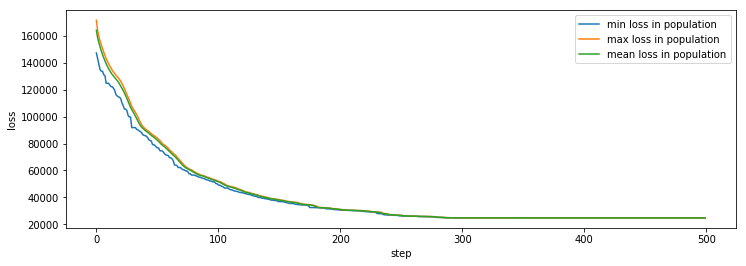

In [99]:
run_sga(times=10, chromosome_length = 100, number_of_iterations = 500, mutation_probability=0.4)

loss = 22416.950393443494
loss = 24237.086153299
loss = 23316.051168608912
loss = 24102.60218682258
loss = 23279.174833252317
loss = 22369.277683848915
loss = 23950.860300297303
loss = 22863.91669209816
loss = 23825.562809453975
loss = 23271.2408037799


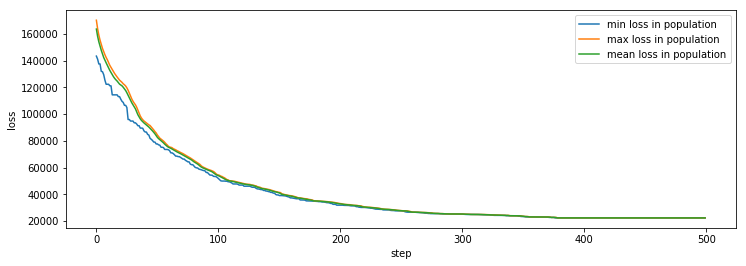

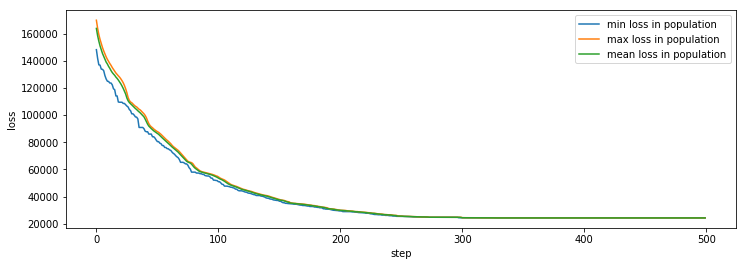

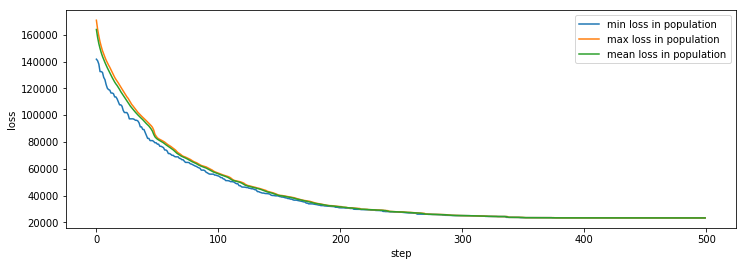

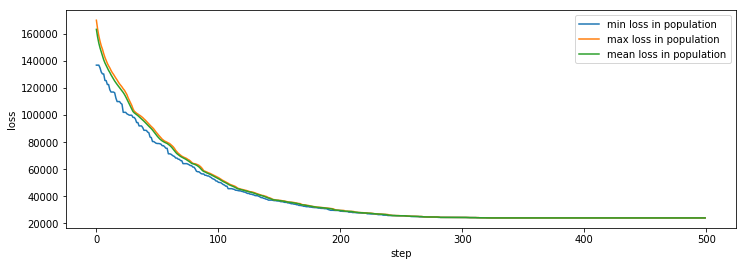

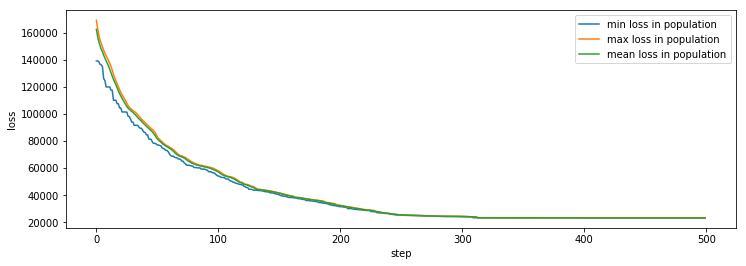

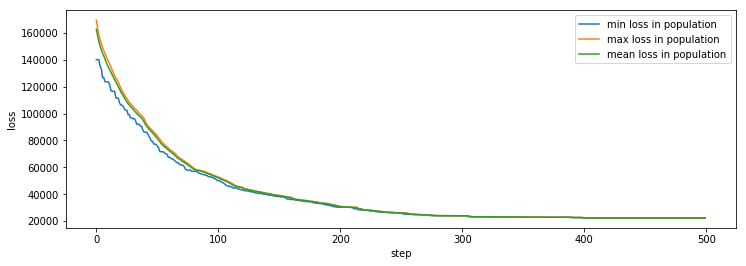

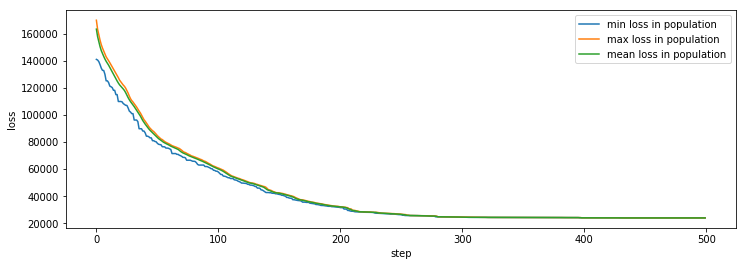

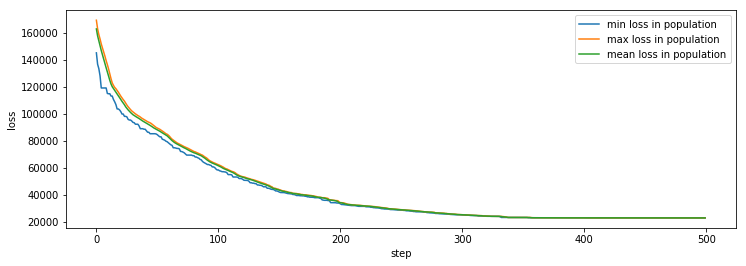

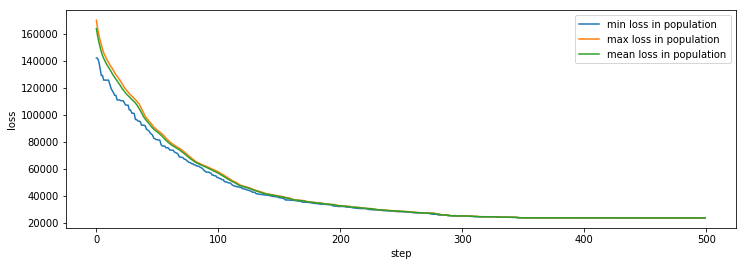

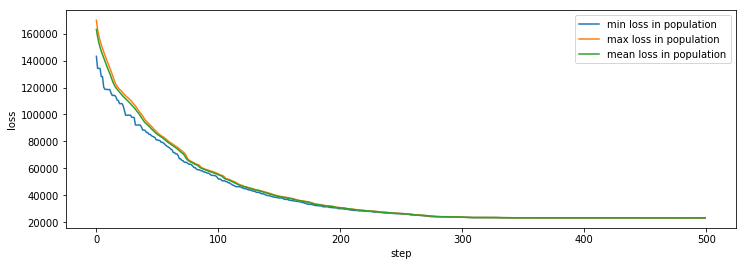

In [100]:
run_sga(times=10, chromosome_length = 100, number_of_iterations = 500, mutation_probability=0.4, crossover_probability=0.96)

loss = 24294.761515664133
loss = 22871.393797926525
loss = 23452.89120255395
loss = 24532.330825708003
loss = 23792.642360209207
loss = 23851.383392191983
loss = 22594.479511312926
loss = 23579.06433018342
loss = 23541.61720728468
loss = 23549.793301897094


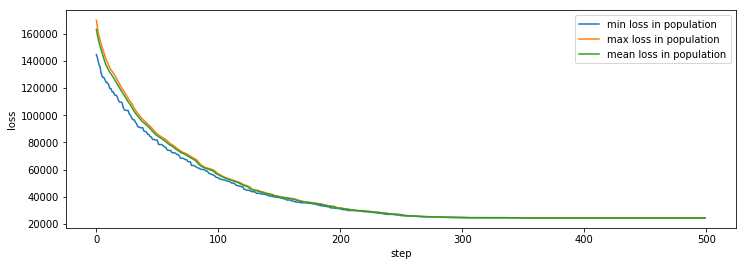

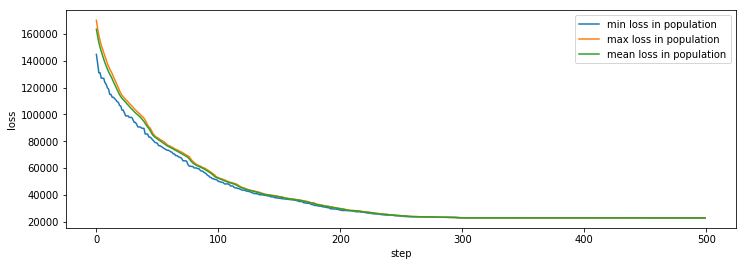

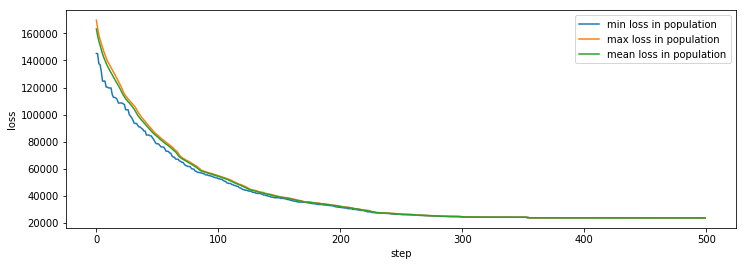

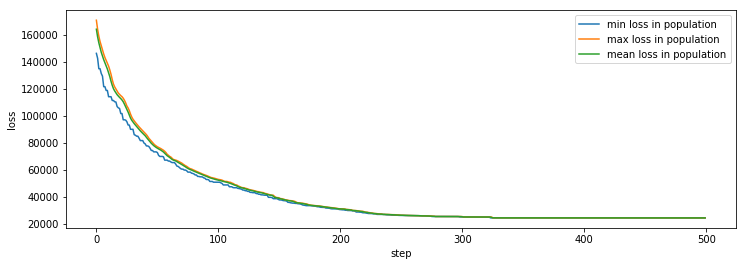

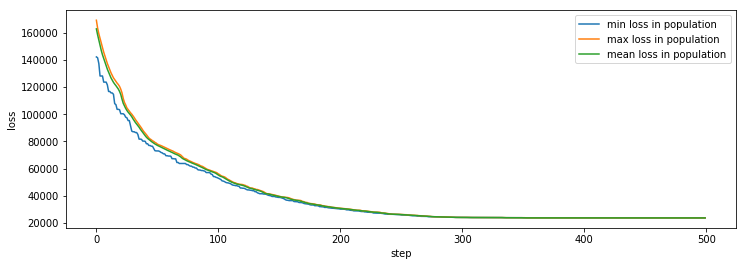

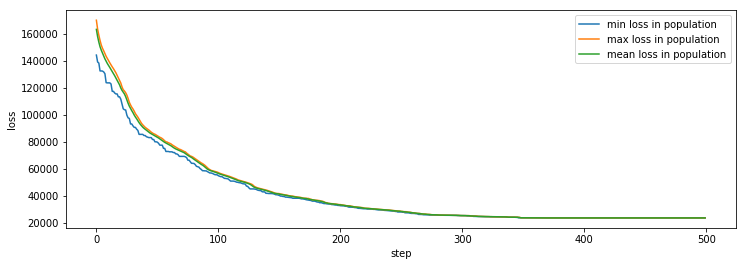

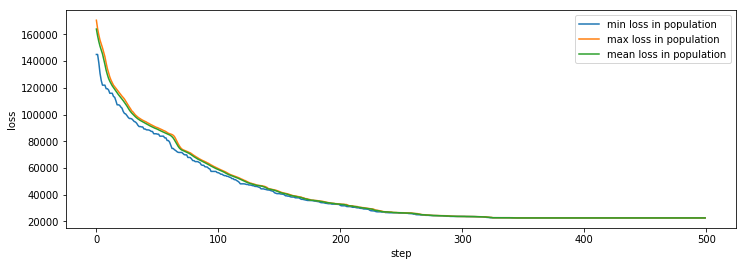

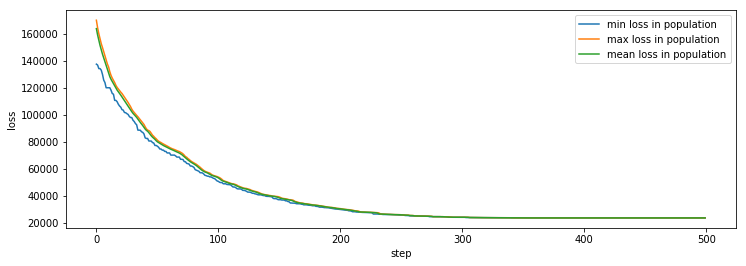

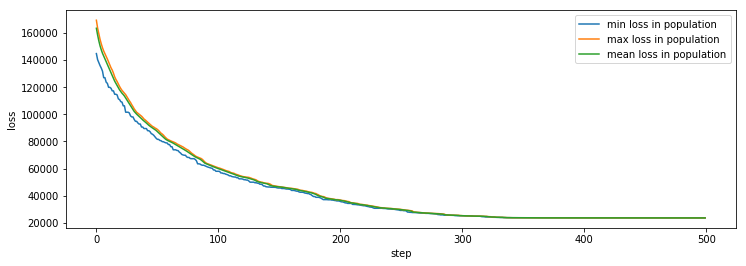

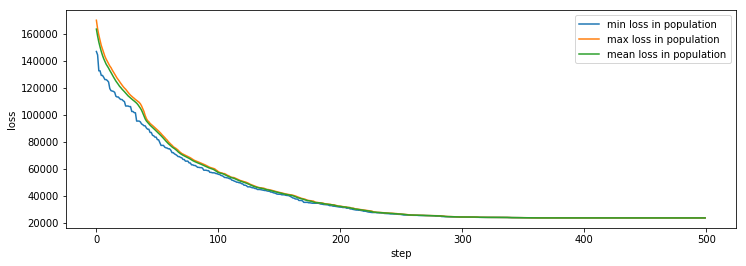

In [101]:
run_sga(times=10, chromosome_length = 100, number_of_iterations = 500, mutation_probability=0.4, crossover_probability=0.94)

55.6020073890686
131534.26348272635 [58 12 44 34 33 56 90 39 46 89 83 47 10 17 37 35 16 51 59 30 79 86 41 98
  5 73 67 57 60 14 23 62 11 43 38 52 74  7 96  2 50 99 70 40 26  9 69 64
 68 66 20 49 29 85 22 71 32 45 13 94  6 25 97 27 53 77 63 28 95 36  8 19
 78  3 88 65 93 48 31  4 75 92 24 76 55 18 21 87 15 80 54 91 82 72  0 84
 42  1 81 61]


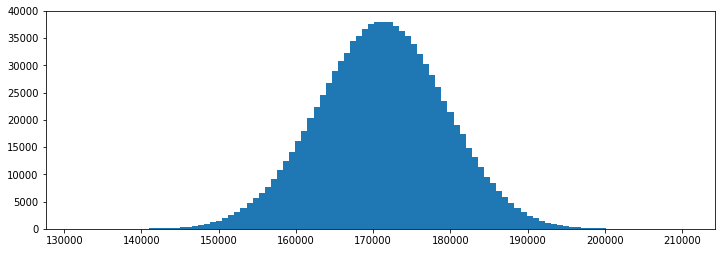

171072.70255515733 8225.982265792685


In [102]:
t0 = time.time()

T = 1000000

permutations = np.empty((T, n), dtype=np.int64)
costs = np.zeros(T)
for i in range(T):
    permutations[i, :] = np.random.permutation(n)
    costs[i] = tsp_objective_function(permutations[i, :])

print(time.time() - t0)

p = permutations[costs.argmin(), :]
print(tsp_objective_function(p), p)

plt.figure(figsize=(12,4))
plt.hist(costs, bins=100)
plt.show()

print(costs.mean(), costs.std())

### KroA150

In [103]:
coords_txt = '''1380 939
2848 96
3510 1671
457 334
3888 666
984 965
2721 1482
1286 525
2716 1432
738 1325
1251 1832
2728 1698
3815 169
3683 1533
1247 1945
123 862
1234 1946
252 1240
611 673
2576 1676
928 1700
53 857
1807 1711
274 1420
2574 946
178 24
2678 1825
1795 962
3384 1498
3520 1079
1256 61
1424 1728
3913 192
3085 1528
2573 1969
463 1670
3875 598
298 1513
3479 821
2542 236
3955 1743
1323 280
3447 1830
2936 337
1621 1830
3373 1646
1393 1368
3874 1318
938 955
3022 474
2482 1183
3854 923
376 825
2519 135
2945 1622
953 268
2628 1479
2097 981
890 1846
2139 1806
2421 1007
2290 1810
1115 1052
2588 302
327 265
241 341
1917 687
2991 792
2573 599
19 674
3911 1673
872 1559
2863 558
929 1766
839 620
3893 102
2178 1619
3822 899
378 1048
1178 100
2599 901
3416 143
2961 1605
611 1384
3113 885
2597 1830
2586 1286
161 906
1429 134
742 1025
1625 1651
1187 706
1787 1009
22 987
3640 43
3756 882
776 392
1724 1642
198 1810
3950 1558
3477 949
91 1732
3972 329
198 1632
1806 733
538 1023
3430 1088
2186 766
1513 1646
2143 1611
53 1657
3404 1307
1034 1344
2823 376
3104 1931
3232 324
2790 1457
374 9
741 146
3083 1938
3502 1067
1280 237
3326 1846
217 38
2503 1172
3527 41
739 1850
3548 1999
48 154
1419 872
1689 1223
3468 1404
1628 253
382 872
3029 1242
3646 1758
285 1029
1782 93
1067 371
2849 1214
920 1835
1741 712
876 220
2753 283
2609 1286
3941 258
3613 523
1754 559
2916 1724
2445 1820'''

n = 150
coords = np.fromstring(coords_txt, sep=' ')
coords = coords.reshape((n, 2))

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print('Distance matrix:\n', A)

Distance matrix:
 [[   0.         1692.82987923 2252.27085405 ...  533.17539328
  1724.96985481 1382.16713895]
 [1692.82987923    0.         1708.46978317 ... 1187.94149688
  1629.41952854 1770.47592472]
 [2252.27085405 1708.46978317    0.         ... 2078.480214
   596.35979073 1075.3724936 ]
 ...
 [ 533.17539328 1187.94149688 2078.480214   ...    0.
  1645.43884724 1437.91585289]
 [1724.96985481 1629.41952854  596.35979073 ... 1645.43884724
     0.          480.68388781]
 [1382.16713895 1770.47592472 1075.3724936  ... 1437.91585289
   480.68388781    0.        ]]


loss = 30519.04955975032
loss = 29918.08388664515
loss = 31372.39204357255
loss = 31302.447120440174
loss = 30784.556969709
loss = 31657.007522211225
loss = 31298.675752920462
loss = 31019.601899848418
loss = 31246.473012858758
loss = 31771.002067187463


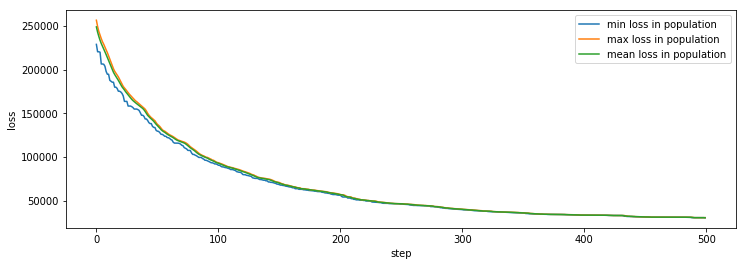

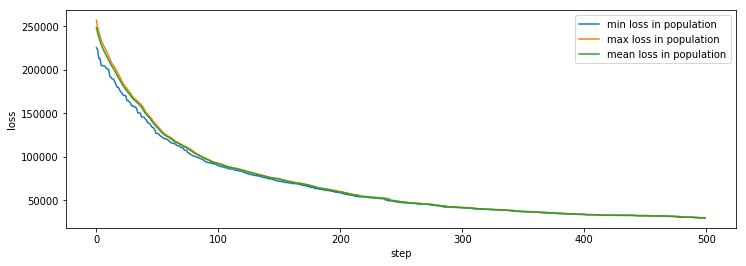

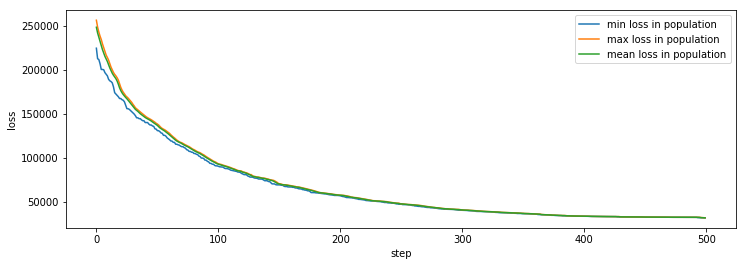

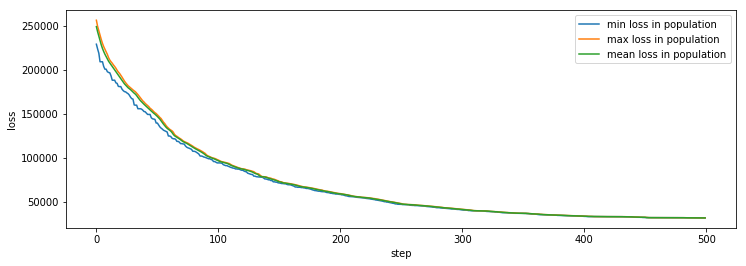

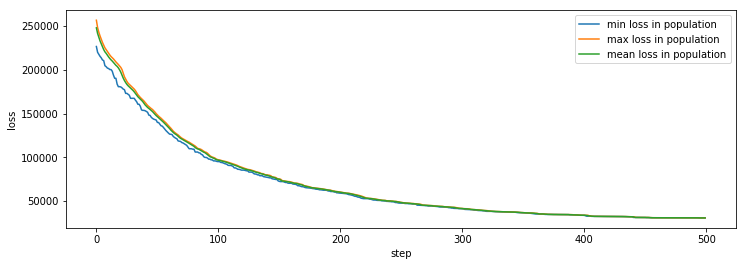

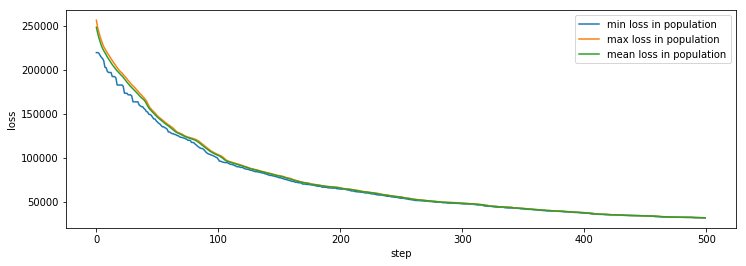

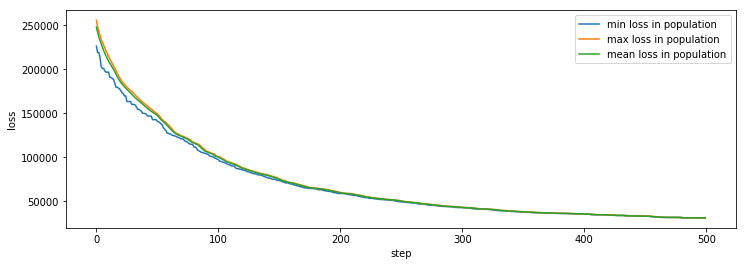

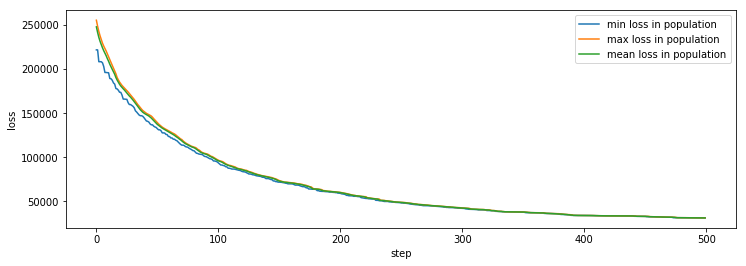

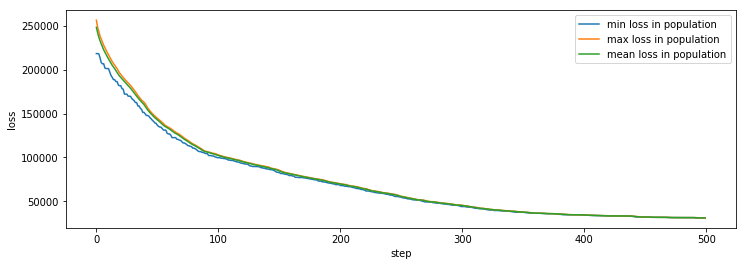

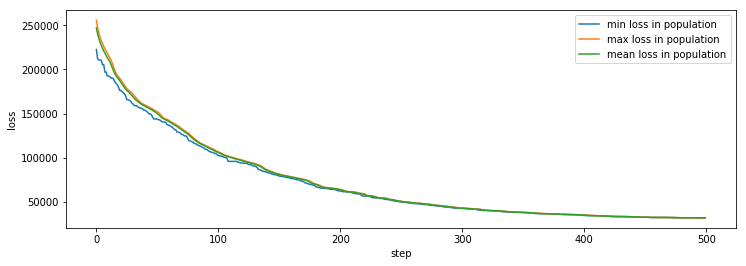

In [104]:
run_sga(times=10, chromosome_length = 150, number_of_iterations = 500)

loss = 30322.229548919688
loss = 31838.5065233478
loss = 30970.118198948574
loss = 30735.201953378062
loss = 29739.339941778362
loss = 30782.250214087486
loss = 31240.624970796696
loss = 31069.52869296178
loss = 32912.222551744926
loss = 30376.428816341282


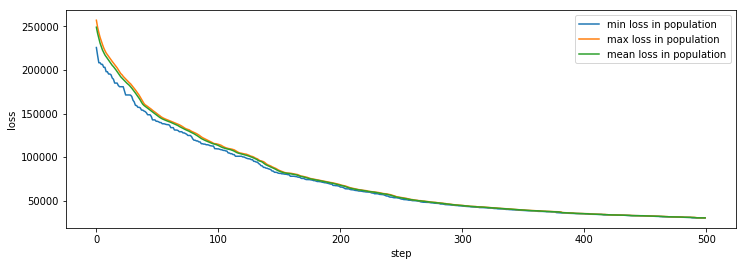

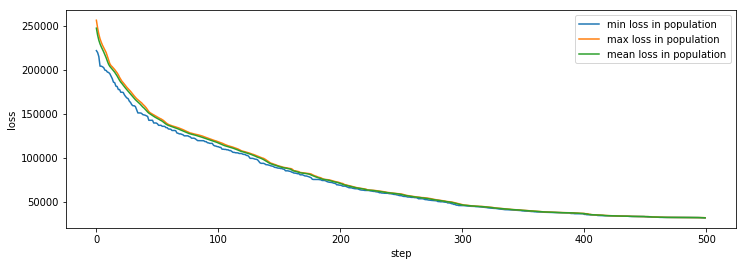

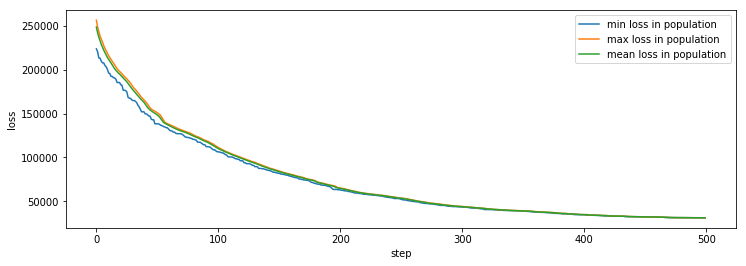

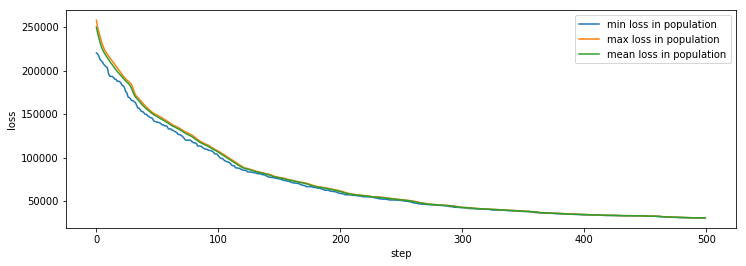

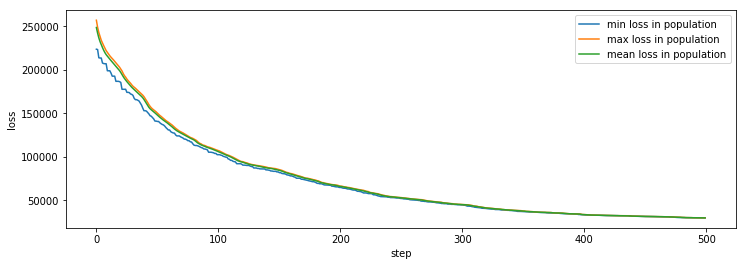

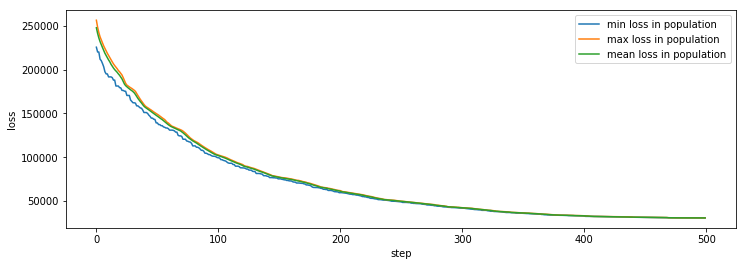

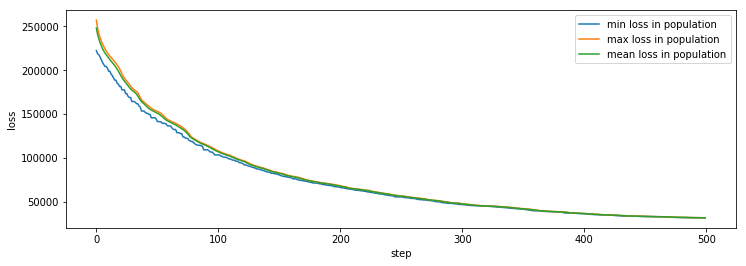

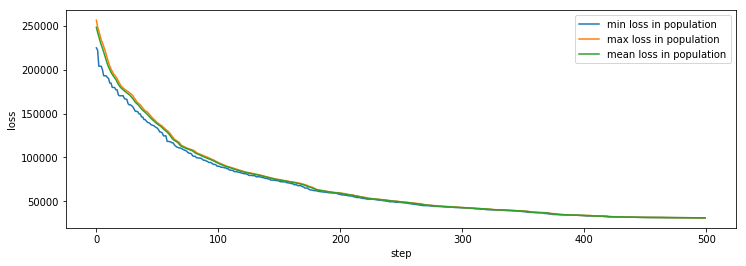

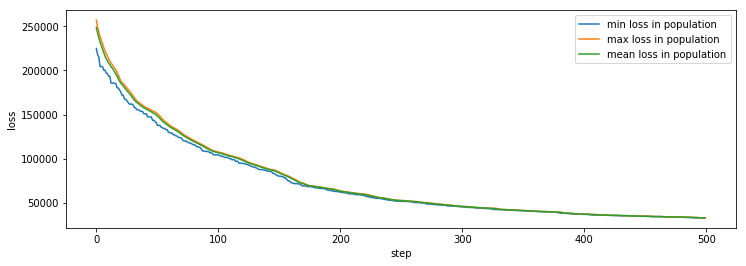

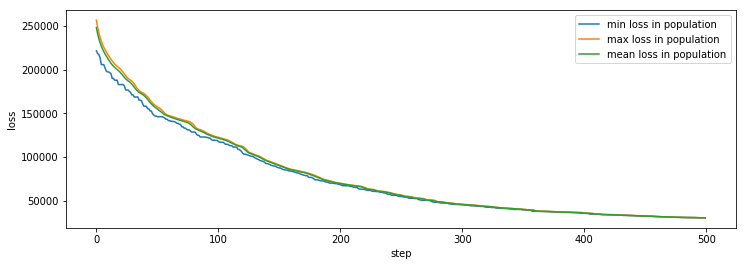

In [105]:
run_sga(times=10, chromosome_length = 150, number_of_iterations = 500, mutation_probability=0.4)

### KroA200

In [106]:
coords_txt = '''1357 1905
2650 802
1774 107
1307 964
3806 746
2687 1353
43 1957
3092 1668
185 1542
834 629
40 462
1183 1391
2048 1628
1097 643
1838 1732
234 1118
3314 1881
737 1285
779 777
2312 1949
2576 189
3078 1541
2781 478
705 1812
3409 1917
323 1714
1660 1556
3729 1188
693 1383
2361 640
2433 1538
554 1825
913 317
3586 1909
2636 727
1000 457
482 1337
3704 1082
3635 1174
1362 1526
2049 417
2552 1909
3939 640
219 898
812 351
901 1552
2513 1572
242 584
826 1226
3278 799
86 1065
14 454
1327 1893
2773 1286
2469 1838
3835 963
1031 428
3853 1712
1868 197
1544 863
457 1607
3174 1064
192 1004
2318 1925
2232 1374
396 828
2365 1649
2499 658
1410 307
2990 214
3646 1018
3394 1028
1779 90
1058 372
2933 1459
3099 173
2178 978
138 1610
2082 1753
2302 1127
805 272
22 1617
3213 1085
99 536
1533 1780
3564 676
29 6
3808 1375
2221 291
3499 1885
3124 408
781 671
1027 1041
3249 378
3297 491
213 220
721 186
3736 1542
868 731
960 303
1380 939
2848 96
3510 1671
457 334
3888 666
984 965
2721 1482
1286 525
2716 1432
738 1325
1251 1832
2728 1698
3815 169
3683 1533
1247 1945
123 862
1234 1946
252 1240
611 673
2576 1676
928 1700
53 857
1807 1711
274 1420
2574 946
178 24
2678 1825
1795 962
3384 1498
3520 1079
1256 61
1424 1728
3913 192
3085 1528
2573 1969
463 1670
3875 598
298 1513
3479 821
2542 236
3955 1743
1323 280
3447 1830
2936 337
1621 1830
3373 1646
1393 1368
3874 1318
938 955
3022 474
2482 1183
3854 923
376 825
2519 135
2945 1622
953 268
2628 1479
2097 981
890 1846
2139 1806
2421 1007
2290 1810
1115 1052
2588 302
327 265
241 341
1917 687
2991 792
2573 599
19 674
3911 1673
872 1559
2863 558
929 1766
839 620
3893 102
2178 1619
3822 899
378 1048
1178 100
2599 901
3416 143
2961 1605
611 1384
3113 885
2597 1830
2586 1286
161 906
1429 134
742 1025
1625 1651
1187 706
1787 1009
22 987
3640 43
3756 882
776 392
1724 1642
198 1810
3950 1558
'''

n = 200
coords = np.fromstring(coords_txt, sep=' ')
coords = coords.reshape((n, 2))

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print('Distance matrix:\n', A)

Distance matrix:
 [[   0.         1699.54641008 1845.72289361 ...  451.50636762
  1162.88692486 2616.11505863]
 [1699.54641008    0.         1118.21330702 ... 1250.23037877
  2651.10693862 1503.84041707]
 [1845.72289361 1118.21330702    0.         ... 1535.81411636
  2320.34156968 2615.41143991]
 ...
 [ 451.50636762 1250.23037877 1535.81411636 ...    0.
  1535.21985396 2227.58434184]
 [1162.88692486 2651.10693862 2320.34156968 ... 1535.21985396
     0.         3760.45316418]
 [2616.11505863 1503.84041707 2615.41143991 ... 2227.58434184
  3760.45316418    0.        ]]


In [41]:
def load_kroA200():
    coords_txt = '''1357 1905
    2650 802
    1774 107
    1307 964
    3806 746
    2687 1353
    43 1957
    3092 1668
    185 1542
    834 629
    40 462
    1183 1391
    2048 1628
    1097 643
    1838 1732
    234 1118
    3314 1881
    737 1285
    779 777
    2312 1949
    2576 189
    3078 1541
    2781 478
    705 1812
    3409 1917
    323 1714
    1660 1556
    3729 1188
    693 1383
    2361 640
    2433 1538
    554 1825
    913 317
    3586 1909
    2636 727
    1000 457
    482 1337
    3704 1082
    3635 1174
    1362 1526
    2049 417
    2552 1909
    3939 640
    219 898
    812 351
    901 1552
    2513 1572
    242 584
    826 1226
    3278 799
    86 1065
    14 454
    1327 1893
    2773 1286
    2469 1838
    3835 963
    1031 428
    3853 1712
    1868 197
    1544 863
    457 1607
    3174 1064
    192 1004
    2318 1925
    2232 1374
    396 828
    2365 1649
    2499 658
    1410 307
    2990 214
    3646 1018
    3394 1028
    1779 90
    1058 372
    2933 1459
    3099 173
    2178 978
    138 1610
    2082 1753
    2302 1127
    805 272
    22 1617
    3213 1085
    99 536
    1533 1780
    3564 676
    29 6
    3808 1375
    2221 291
    3499 1885
    3124 408
    781 671
    1027 1041
    3249 378
    3297 491
    213 220
    721 186
    3736 1542
    868 731
    960 303
    1380 939
    2848 96
    3510 1671
    457 334
    3888 666
    984 965
    2721 1482
    1286 525
    2716 1432
    738 1325
    1251 1832
    2728 1698
    3815 169
    3683 1533
    1247 1945
    123 862
    1234 1946
    252 1240
    611 673
    2576 1676
    928 1700
    53 857
    1807 1711
    274 1420
    2574 946
    178 24
    2678 1825
    1795 962
    3384 1498
    3520 1079
    1256 61
    1424 1728
    3913 192
    3085 1528
    2573 1969
    463 1670
    3875 598
    298 1513
    3479 821
    2542 236
    3955 1743
    1323 280
    3447 1830
    2936 337
    1621 1830
    3373 1646
    1393 1368
    3874 1318
    938 955
    3022 474
    2482 1183
    3854 923
    376 825
    2519 135
    2945 1622
    953 268
    2628 1479
    2097 981
    890 1846
    2139 1806
    2421 1007
    2290 1810
    1115 1052
    2588 302
    327 265
    241 341
    1917 687
    2991 792
    2573 599
    19 674
    3911 1673
    872 1559
    2863 558
    929 1766
    839 620
    3893 102
    2178 1619
    3822 899
    378 1048
    1178 100
    2599 901
    3416 143
    2961 1605
    611 1384
    3113 885
    2597 1830
    2586 1286
    161 906
    1429 134
    742 1025
    1625 1651
    1187 706
    1787 1009
    22 987
    3640 43
    3756 882
    776 392
    1724 1642
    198 1810
    3950 1558
    '''

    n = 200
    coords = np.fromstring(coords_txt, sep=' ')
    coords = coords.reshape((n, 2))

    A = np.empty((n, n))
    for i in range(n):
        for j in range(n):
            A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
            
    return n, A

loss = 44194.71294375653
loss = 44479.631304610375
loss = 45843.324677335135
loss = 43501.47646438797
loss = 44553.58981334468
loss = 47796.75245595468
loss = 41613.839900490384
loss = 41601.89482718514
loss = 42653.667096513505
loss = 44523.520771691896


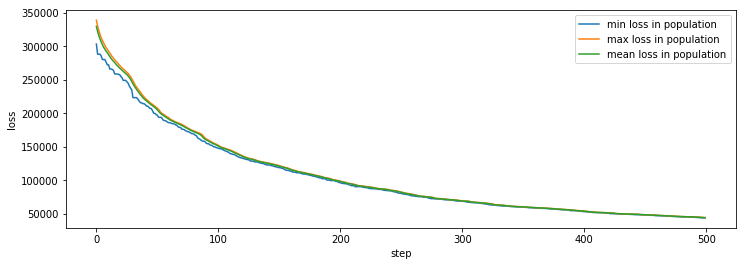

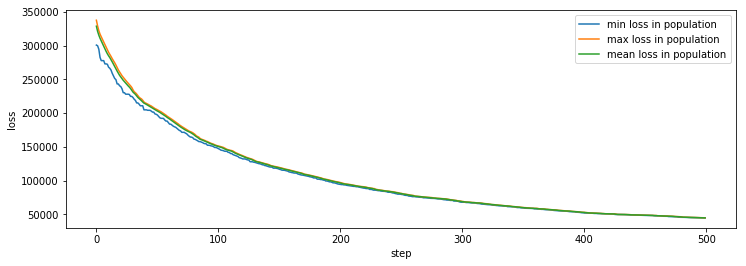

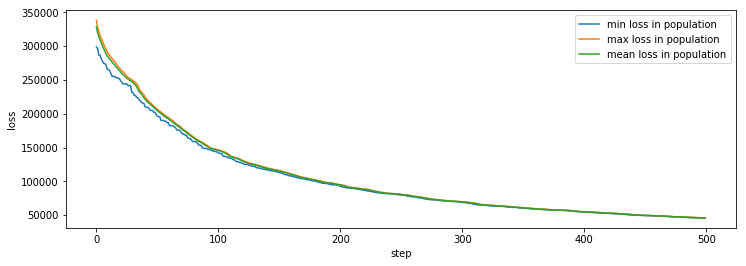

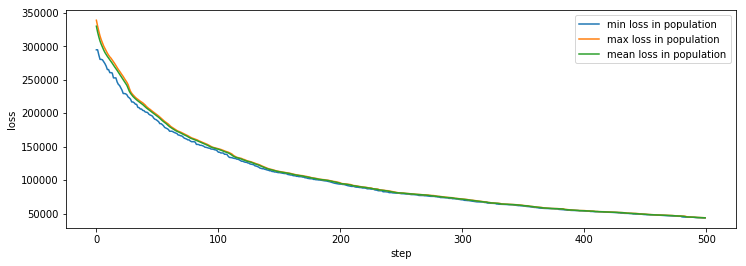

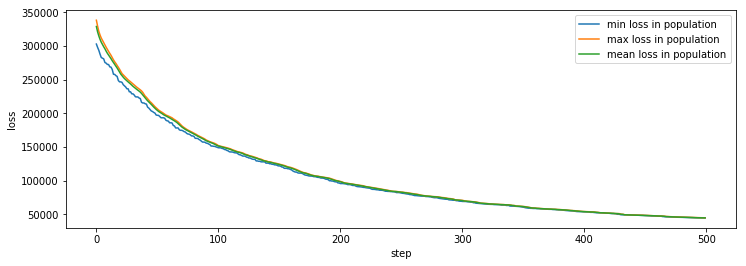

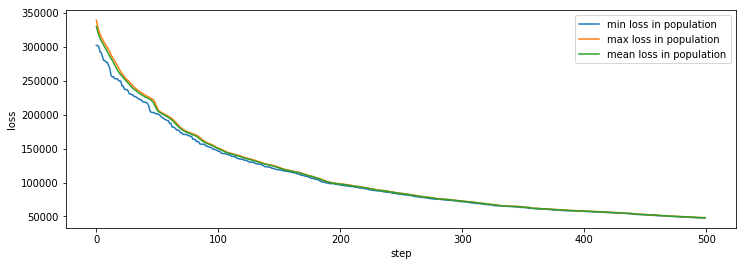

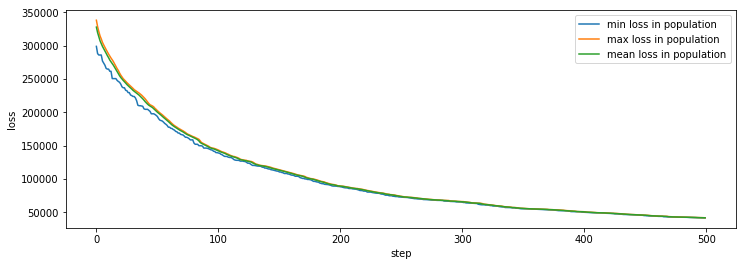

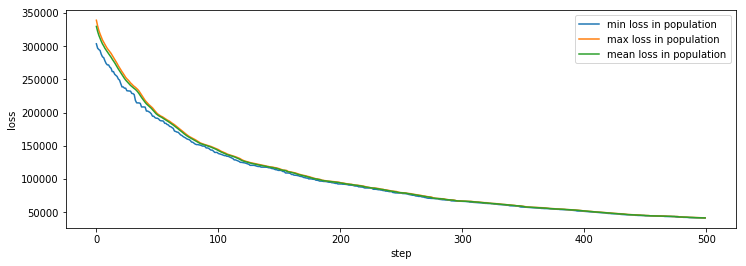

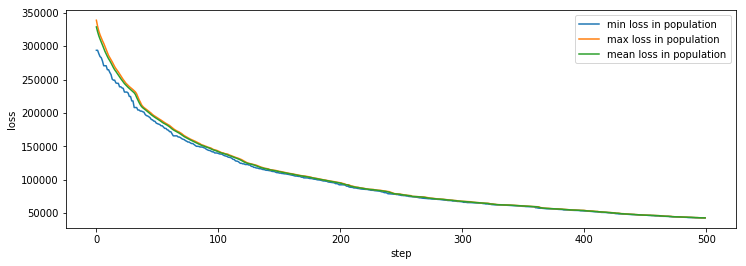

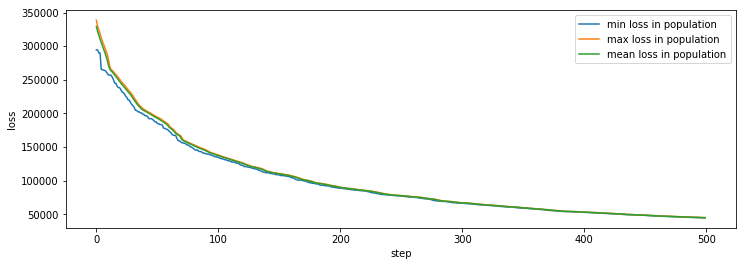

In [108]:
run_sga(times=10, chromosome_length = 200, number_of_iterations = 500)

loss = 35340.079943830875
loss = 34067.849719717306
loss = 33492.765391255285
loss = 34478.83483024694
loss = 33563.06214413635
loss = 35218.16823924757
loss = 35019.67891011324
loss = 33791.13637928931
loss = 35083.230764504035
loss = 35066.4841454105


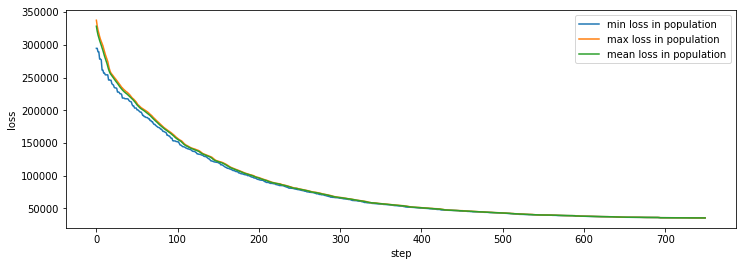

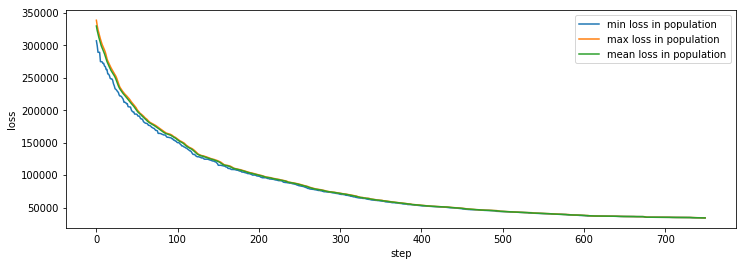

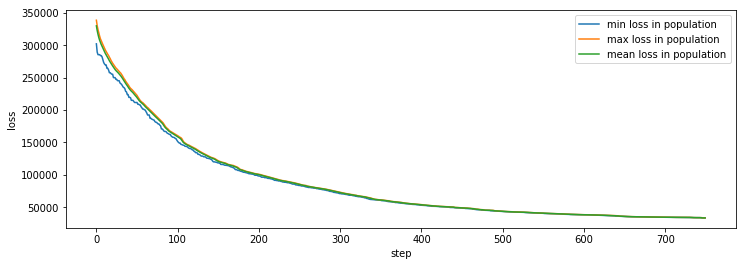

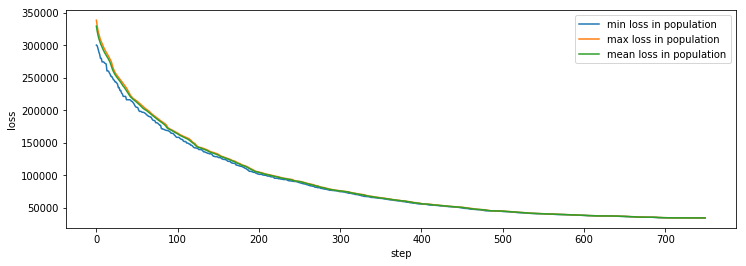

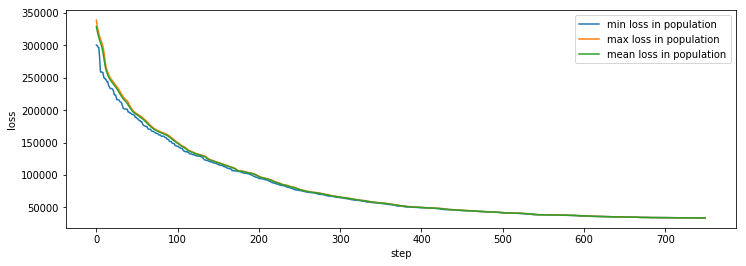

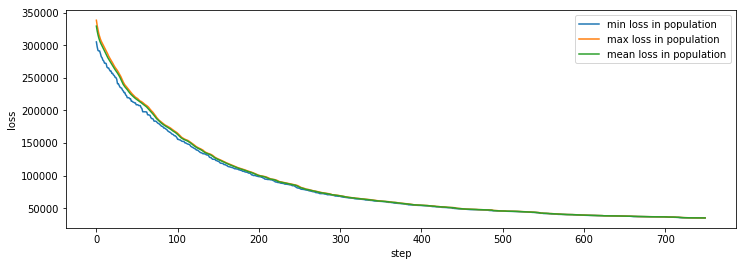

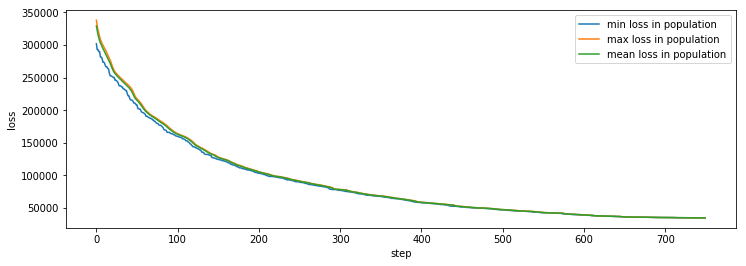

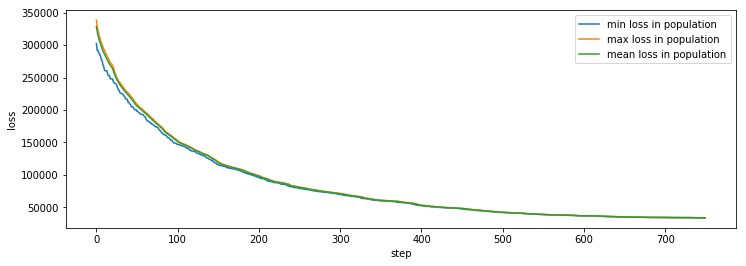

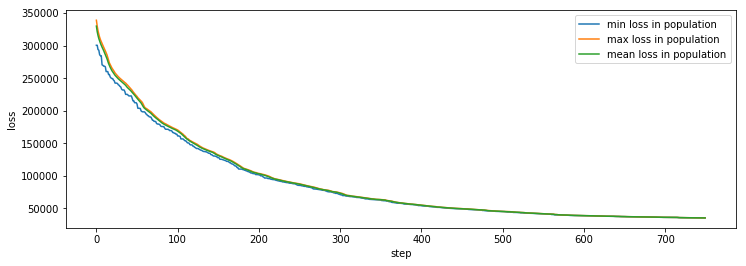

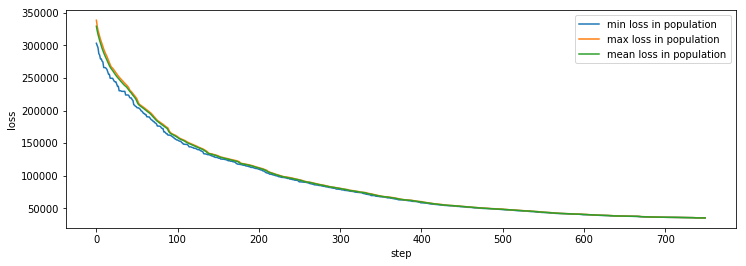

In [109]:
run_sga(times=10, chromosome_length = 200, number_of_iterations = 750, mutation_probability=0.4)

104.41600370407104
279323.7618744315 [155 141 103 148 142  62  68  94 104 145  43 158 186  74 156  89  22 132
 166  79 119  98  17  44  32  41 176 169 172 181  10 146 168  71 102  14
  96 183  31 198  99  60 120  49  30 153  63 133 178  59  15   1 185  38
 137 123 130  95 125  47 118 188  24  50 110 147  61  23  92  86 105 190
  45  56 180 162 112 134 199 177 174 114  88 192 135  51 191  58 159  55
 167  13  85 101 154 161 150  33  93  19 197  16  21 126   6 136 189 187
   3  91   9 131  82  75  29 122  97 116 171  27  64  40   2  26  35 129
  42 107  48  77  83   8  81 164  36  73   0 115 109  18  28   5 182  69
 121 173 152 165  84  72 149 179 196  57  80  37  70 170  76 139  39 193
  65  78  52 151 138 127 113  20  87  25  12 184 195  11  46 106  66 108
 143 175   4 163 144 128  53 100 157 111  54  90 194  34  67 160   7 140
 117 124]


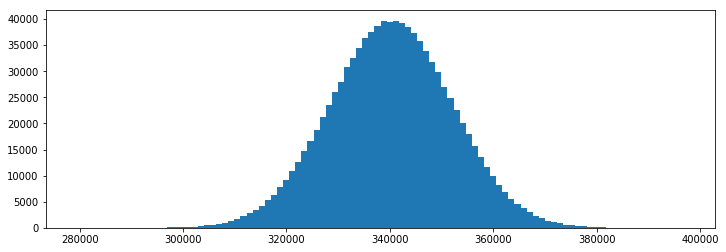

340229.5938978593 11796.655986493937


In [110]:
t0 = time.time()

T = 1000000

permutations = np.empty((T, n), dtype=np.int64)
costs = np.zeros(T)
for i in range(T):
    permutations[i, :] = np.random.permutation(n)
    costs[i] = tsp_objective_function(permutations[i, :])

print(time.time() - t0)

p = permutations[costs.argmin(), :]
print(tsp_objective_function(p), p)

plt.figure(figsize=(12,4))
plt.hist(costs, bins=100)
plt.show()

print(costs.mean(), costs.std())

### Problem 2

loss = 1643.0
loss = 1650.0
loss = 1669.0
loss = 1658.0
loss = 1679.0
loss = 1642.0
loss = 1727.0
loss = 1659.0
loss = 1635.0
loss = 1628.0


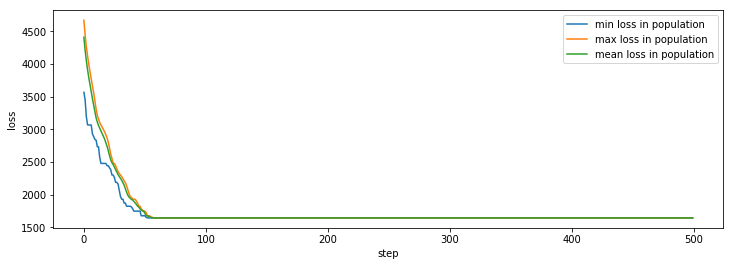

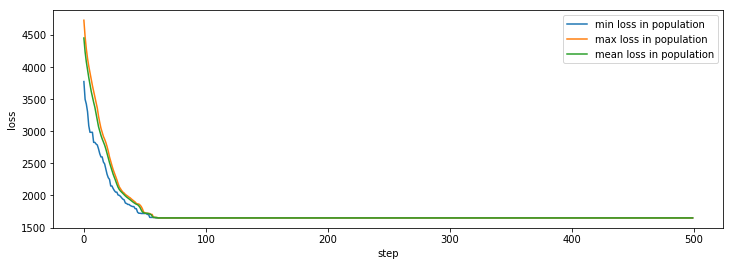

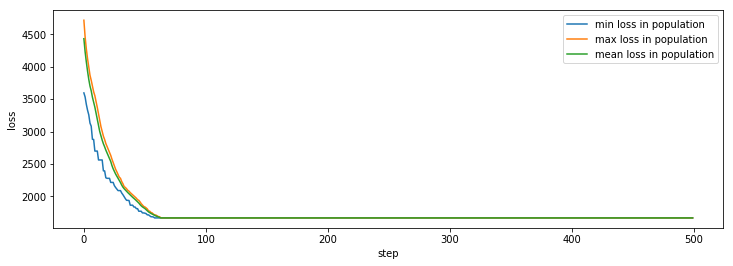

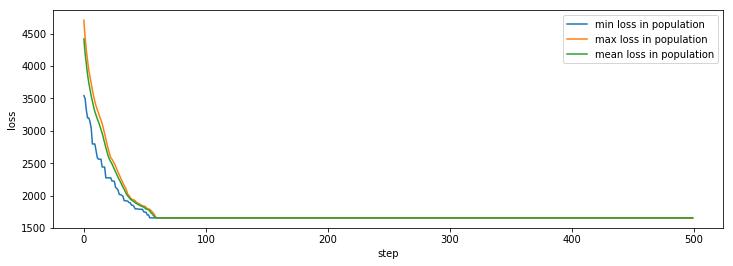

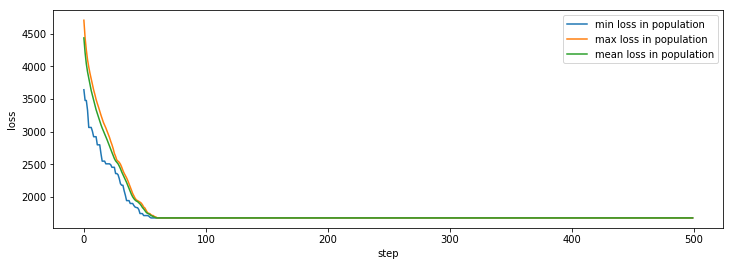

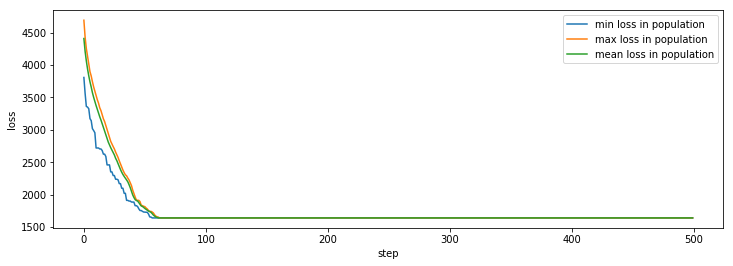

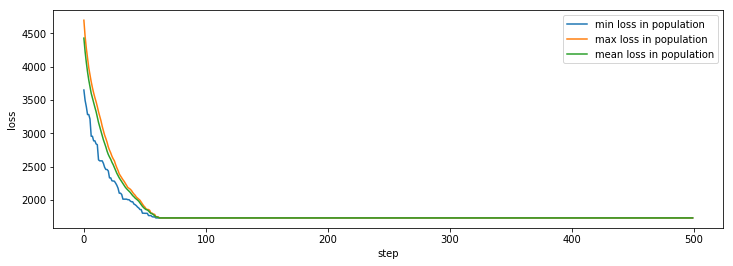

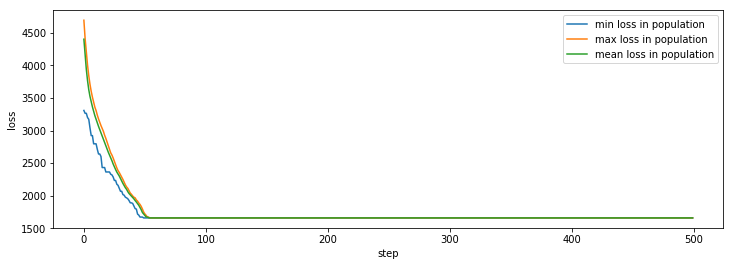

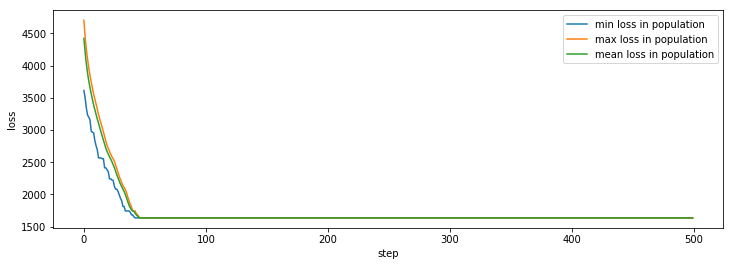

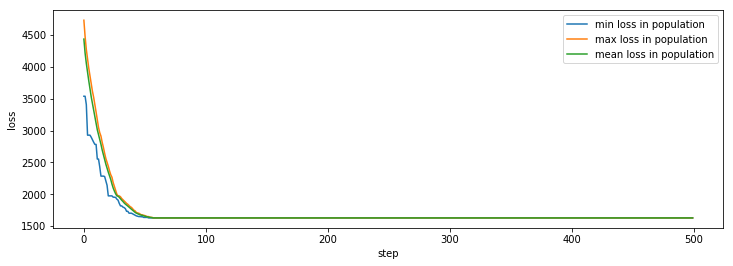

In [55]:
n, A, p = load_bayg29()
run_sga(times=10, chromosome_length = n, crossover=PMX, number_of_iterations = 500, mutation_probability=0.4)

loss = 1622.0
loss = 1622.0
loss = 1620.0
loss = 1634.0
loss = 1622.0
loss = 1658.0
loss = 1610.0
loss = 1610.0
loss = 1669.0
loss = 1622.0


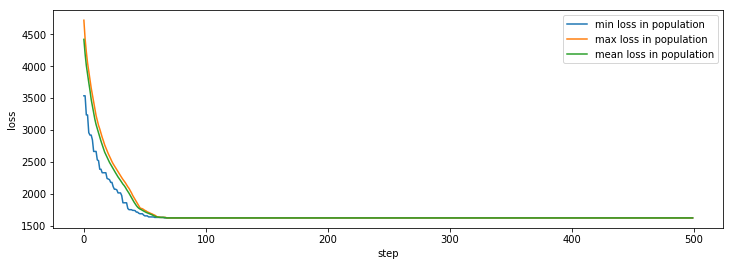

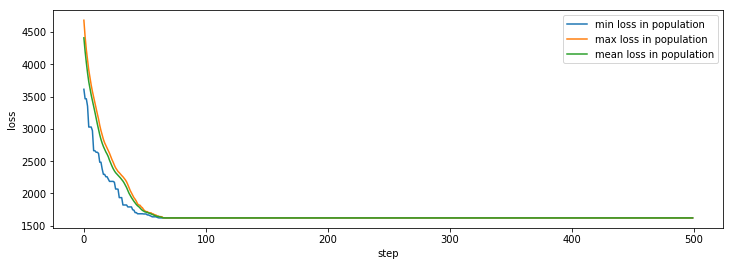

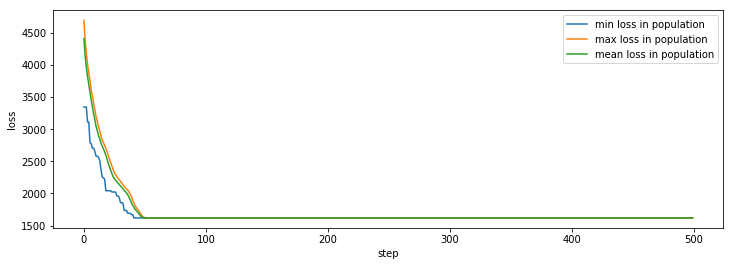

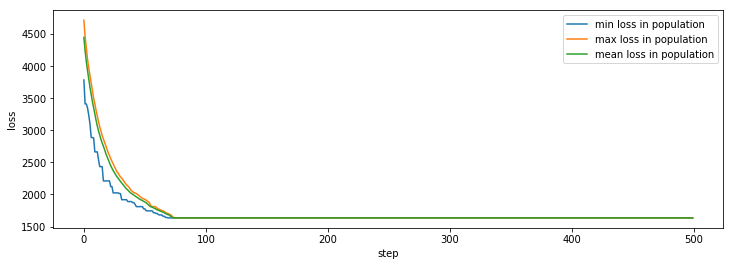

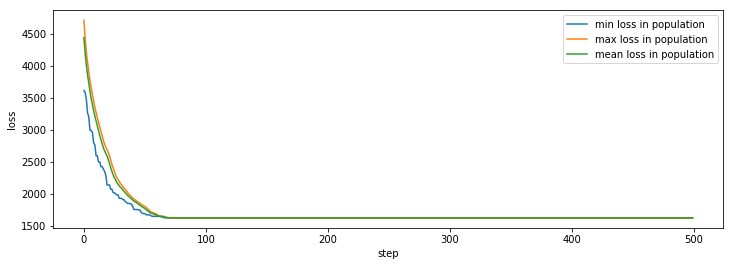

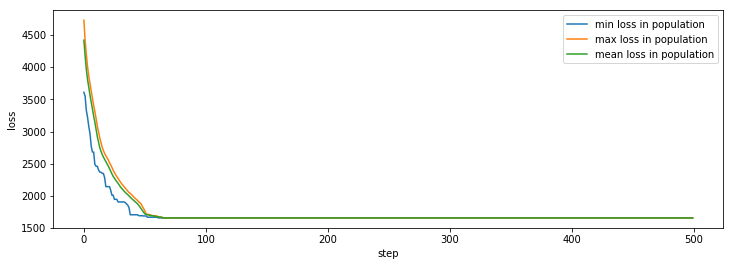

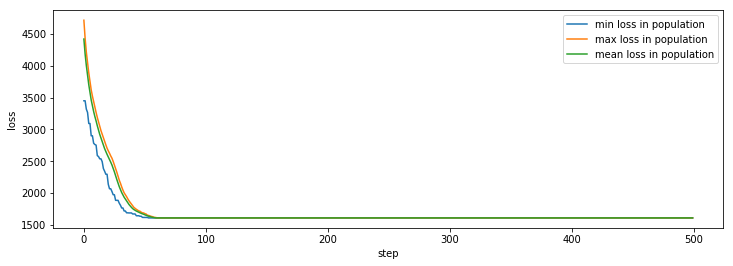

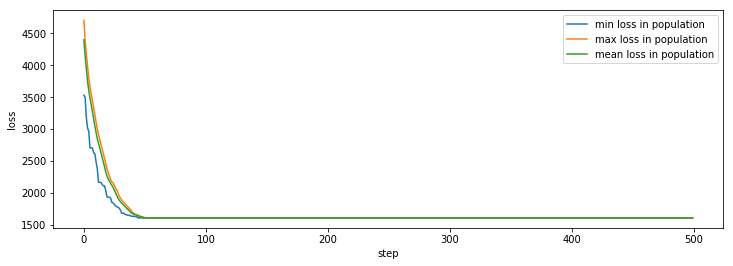

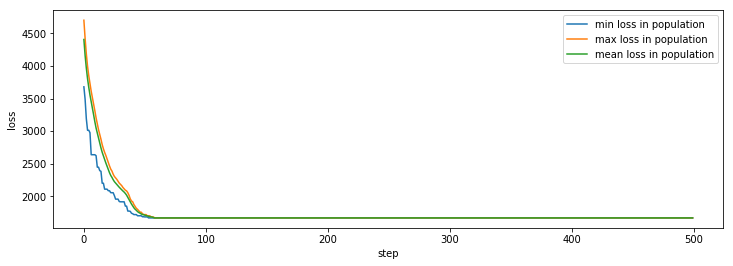

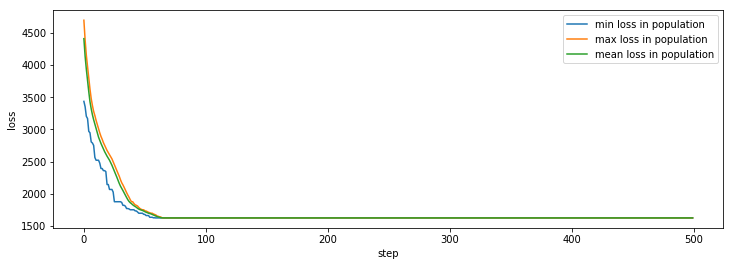

In [40]:
n, A, p = load_bayg29()
run_sga(times=10, chromosome_length = n, crossover=OX, number_of_iterations = 500, mutation_probability=0.4)

loss = 1640.0
loss = 1676.0
loss = 1666.0
loss = 1684.0
loss = 1732.0
loss = 1632.0
loss = 1645.0
loss = 1675.0
loss = 1666.0
loss = 1649.0


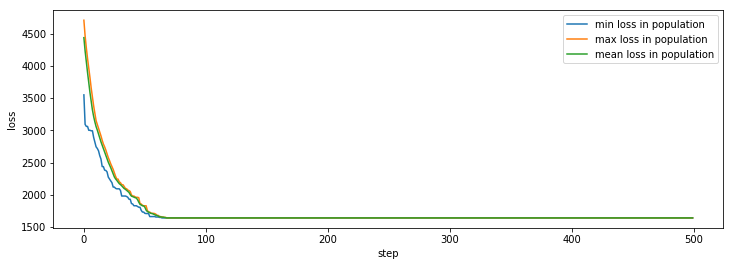

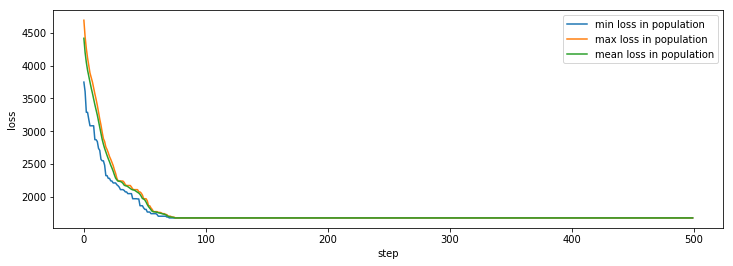

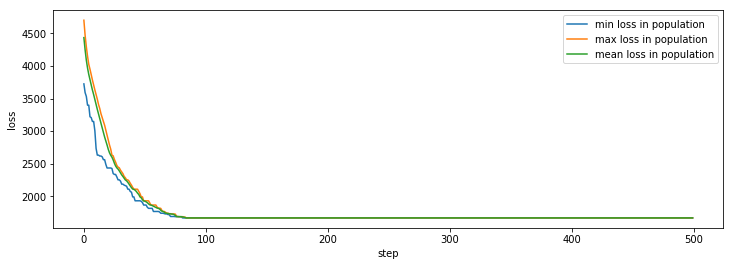

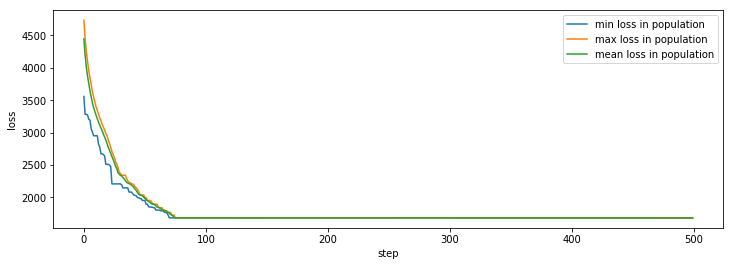

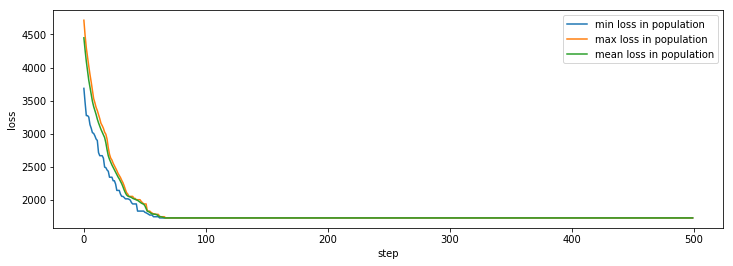

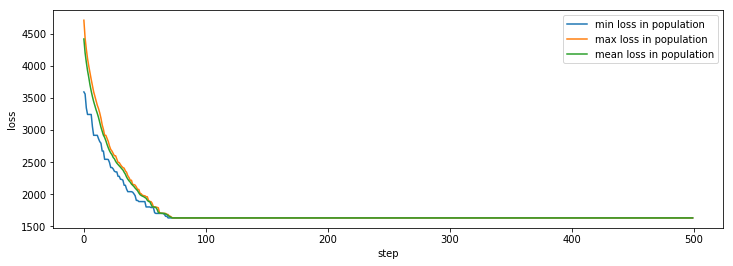

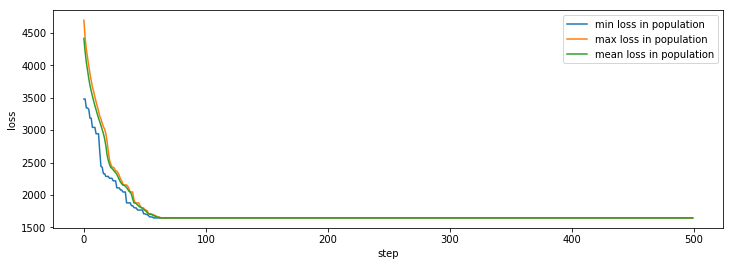

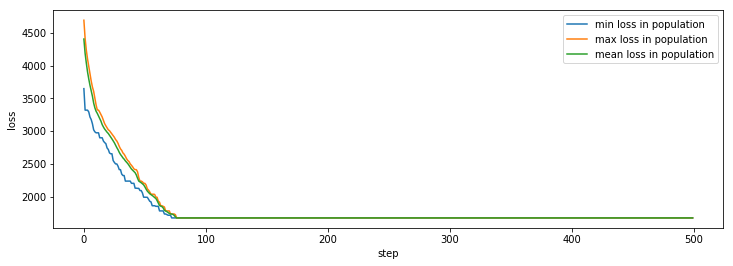

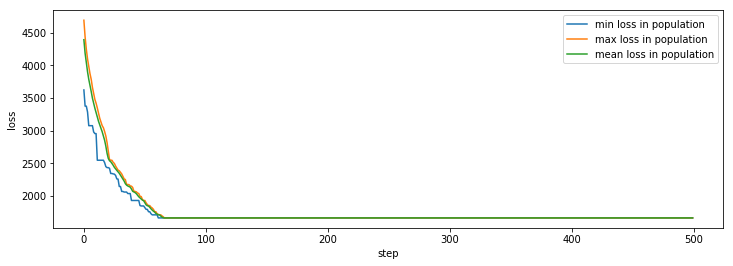

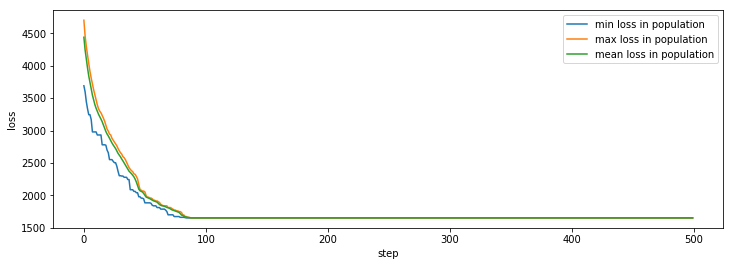

In [61]:
n, A, p = load_bayg29()
run_sga(times=10, chromosome_length = n, crossover=CX, number_of_iterations = 500, mutation_probability=0.4)

loss = 1696.0
loss = 1635.0
loss = 1610.0
loss = 1643.0
loss = 1728.0
loss = 1669.0
loss = 1622.0
loss = 1708.0
loss = 1699.0
loss = 1622.0


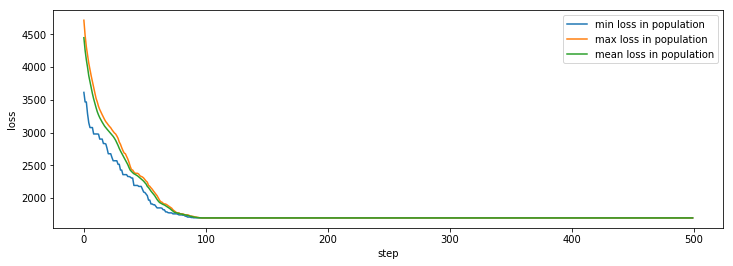

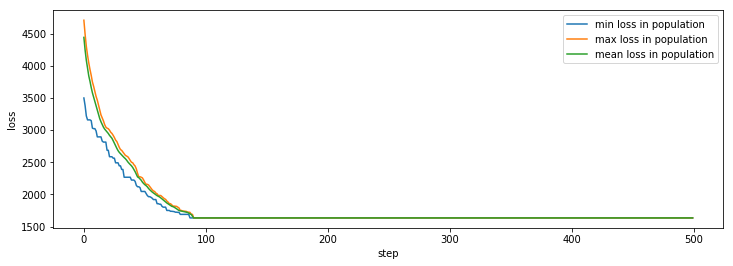

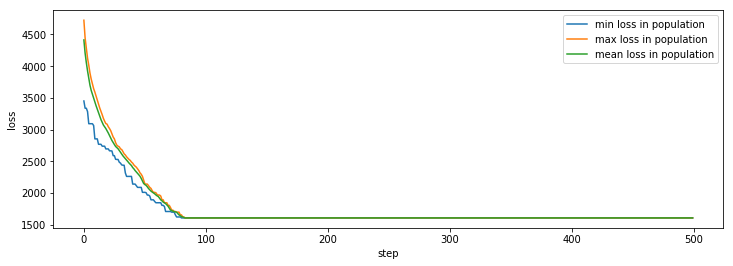

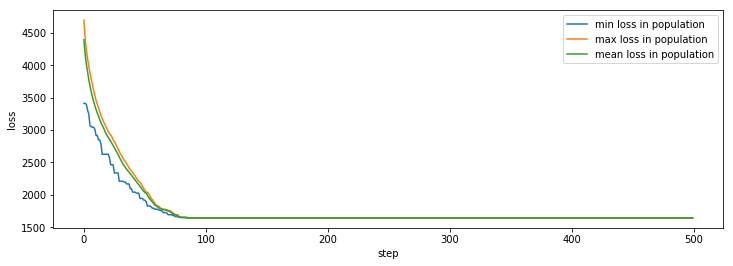

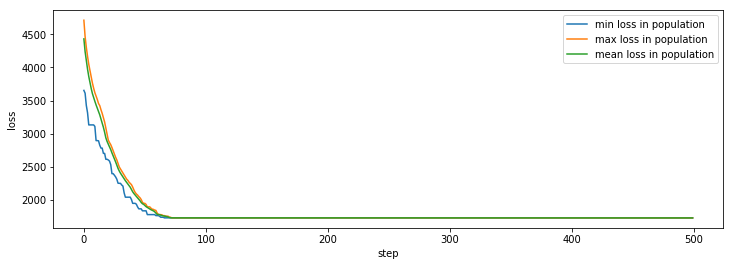

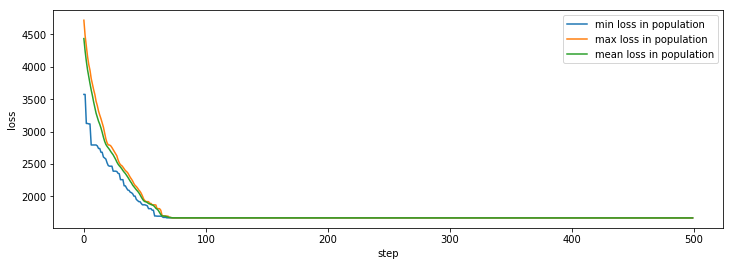

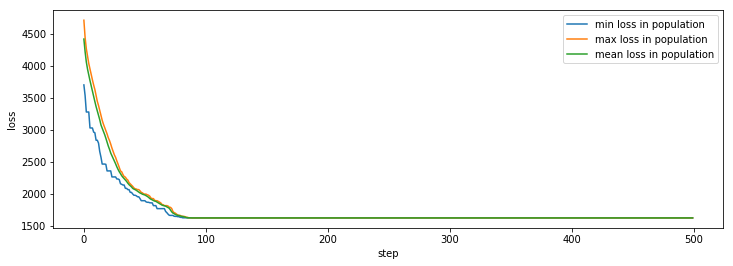

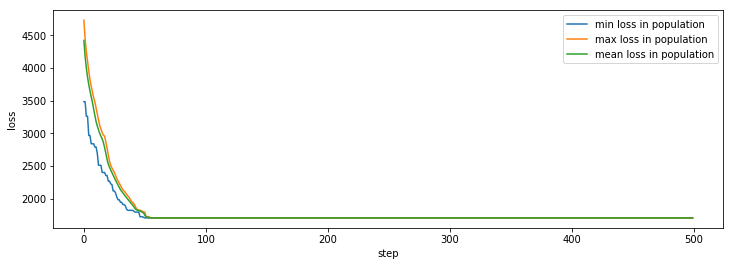

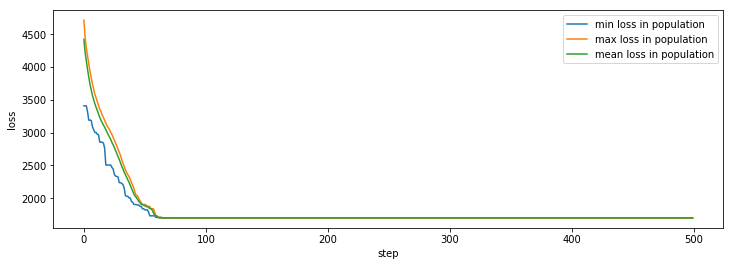

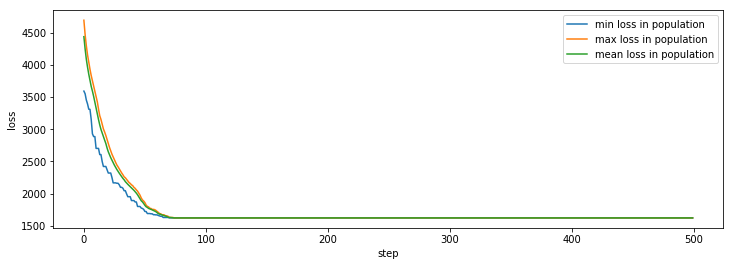

In [77]:
n, A, p = load_bayg29()
run_sga(times=10, chromosome_length = n, crossover=PBX, number_of_iterations = 500, mutation_probability=0.4)

loss = 35947.59670059686
loss = 33617.19868590562
loss = 34246.10510707552
loss = 34821.22006542911
loss = 34718.17111602019
loss = 34219.07412171281
loss = 34587.995112004726
loss = 34948.81126579236
loss = 35336.983706737796
loss = 35506.97325236862


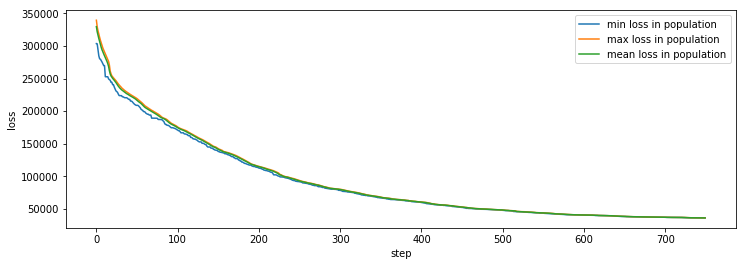

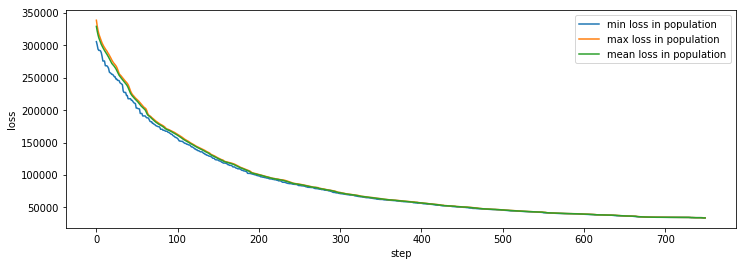

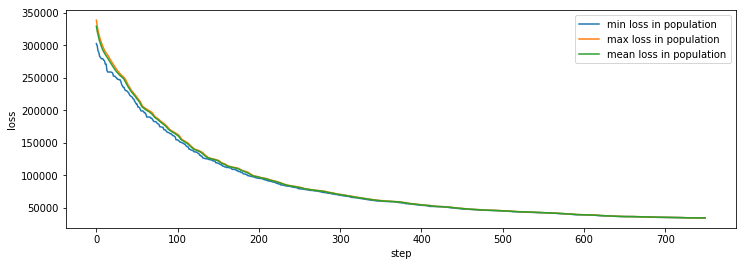

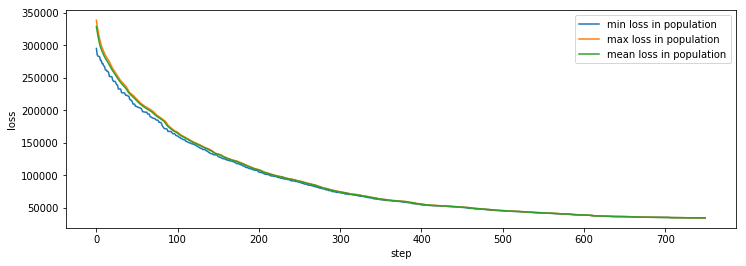

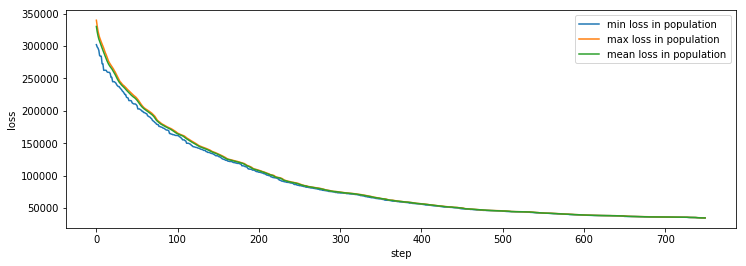

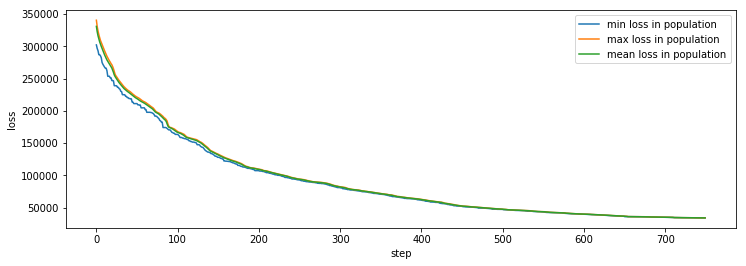

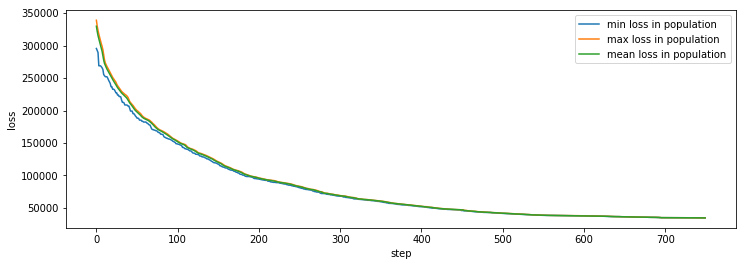

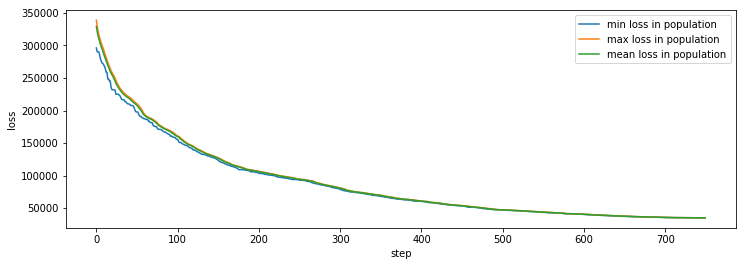

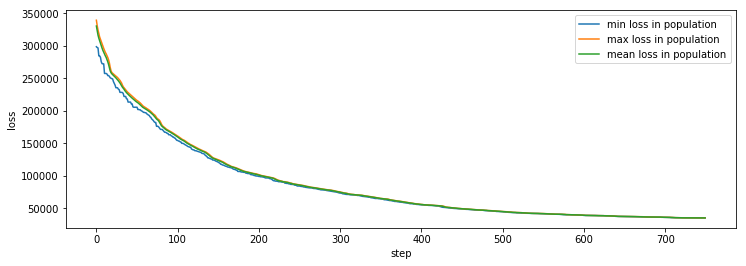

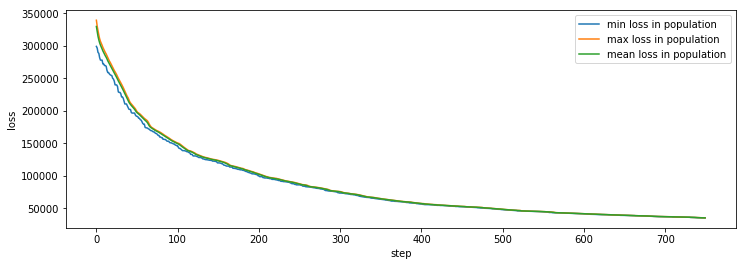

In [78]:
n, A = load_kroA200()
run_sga(times=10, chromosome_length = n, crossover=PMX, number_of_iterations = 750, mutation_probability=0.4)

loss = 36352.19006072544
loss = 34626.081042034784
loss = 37308.20429181197
loss = 34253.751382630995
loss = 34695.054816176606
loss = 36935.84508646091
loss = 35305.42604647593
loss = 33728.541439926215
loss = 36006.41648547598
loss = 34608.08042205481


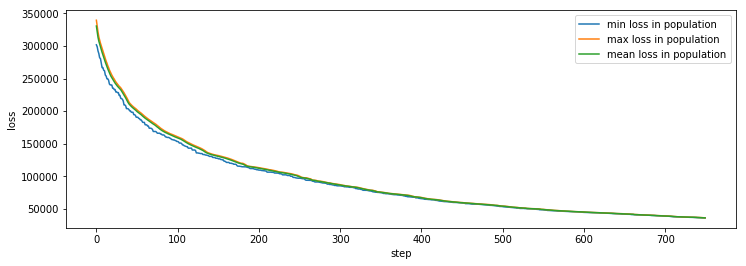

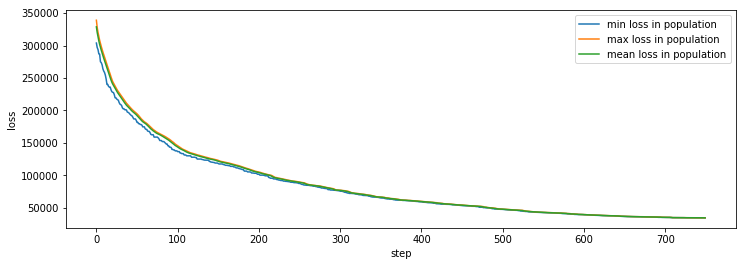

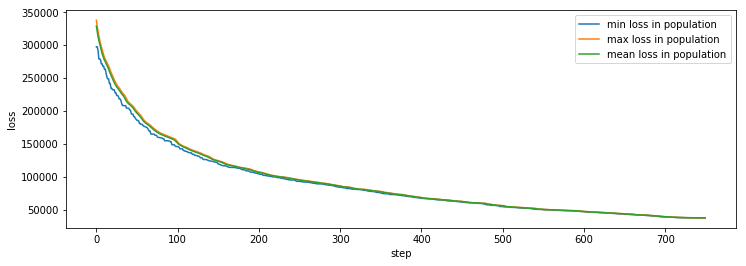

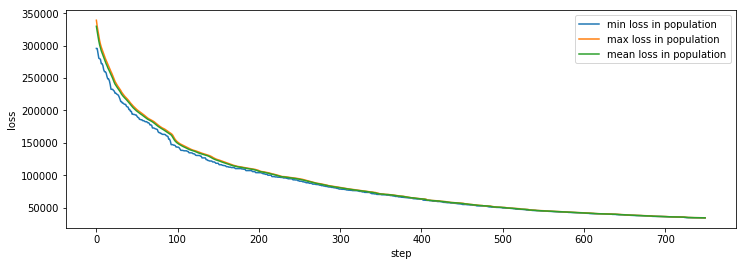

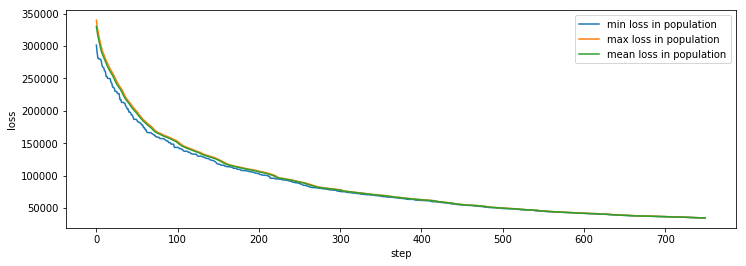

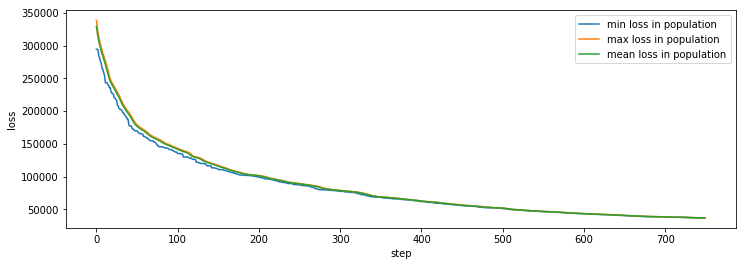

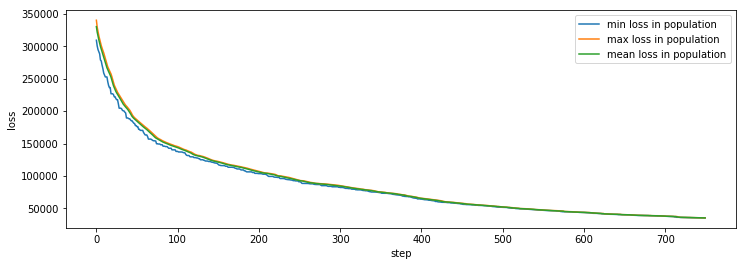

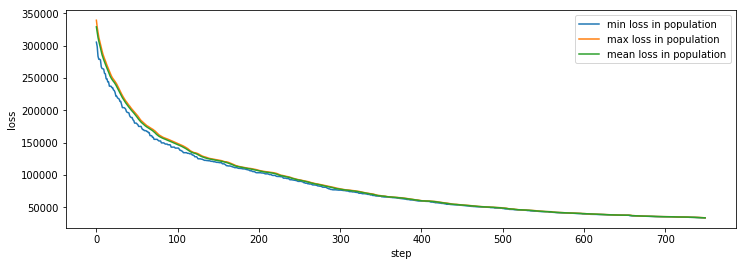

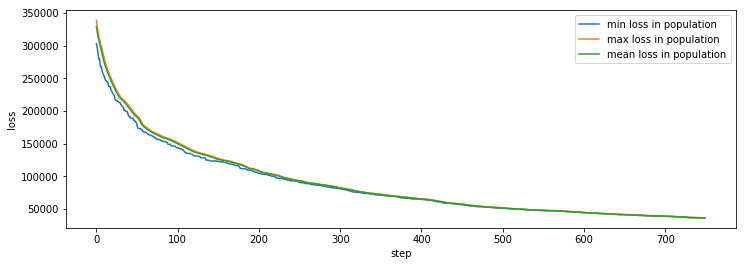

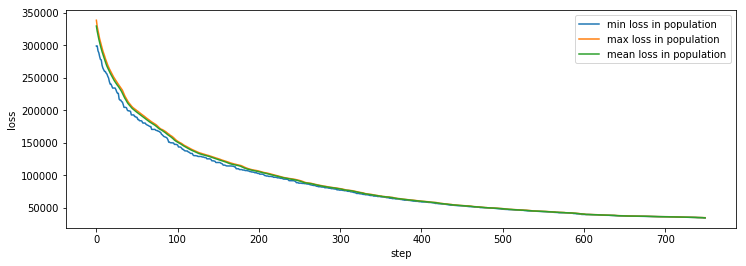

In [79]:
n, A = load_kroA200()
run_sga(times=10, chromosome_length = n, crossover=OX, number_of_iterations = 750, mutation_probability=0.4)

loss = 74249.00413121334
loss = 77341.93322597654
loss = 74390.60153729082
loss = 70879.01263357137
loss = 73312.89106957373
loss = 65433.242906469684
loss = 69836.44642882384
loss = 78044.6364707017
loss = 63091.073860118595
loss = 69651.69632346478


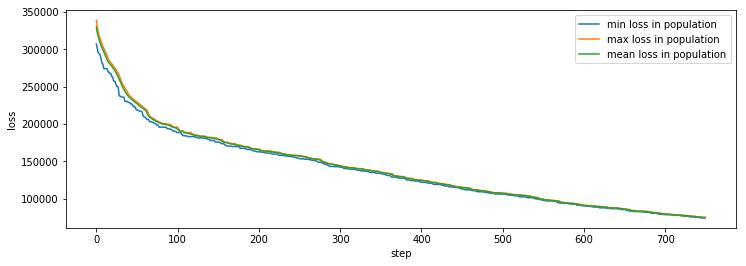

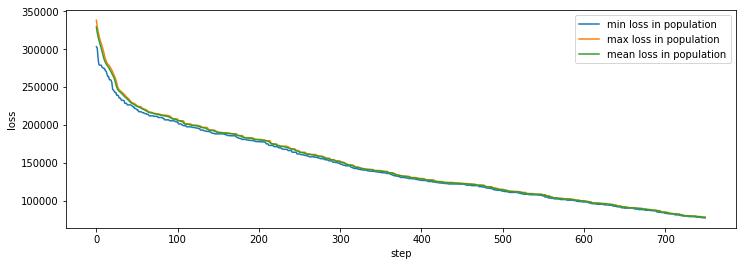

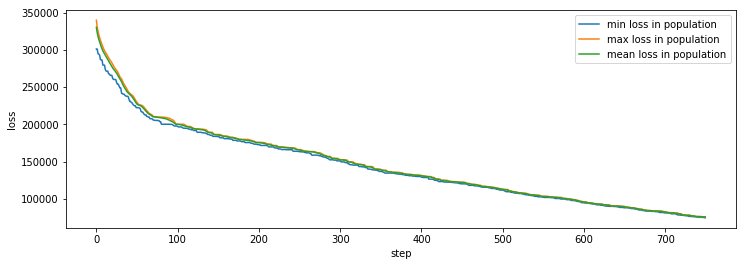

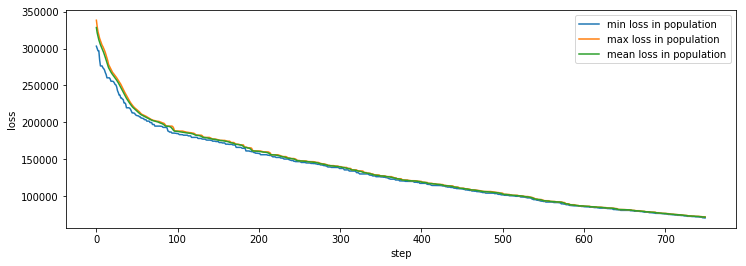

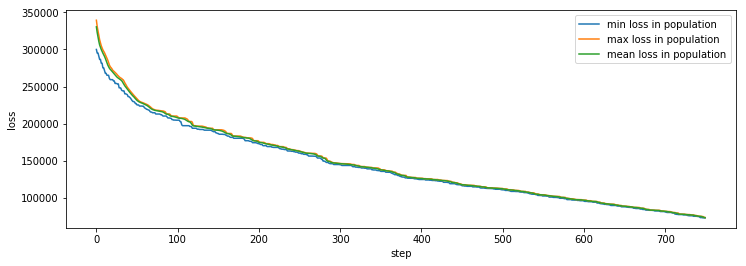

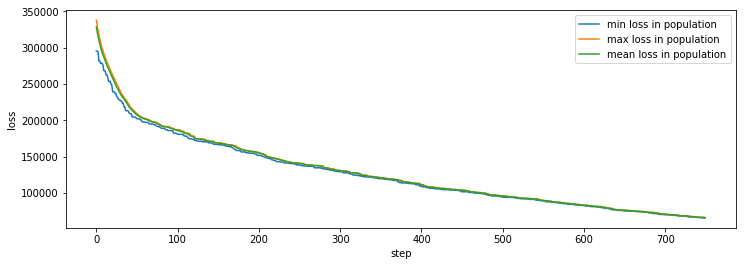

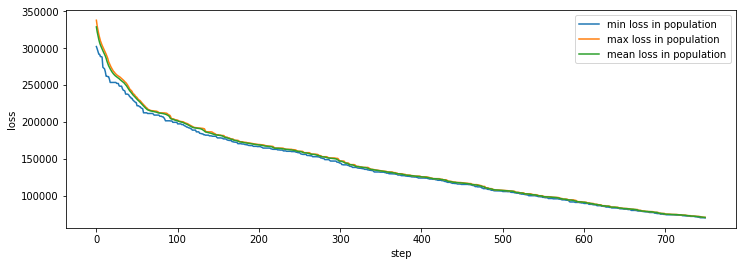

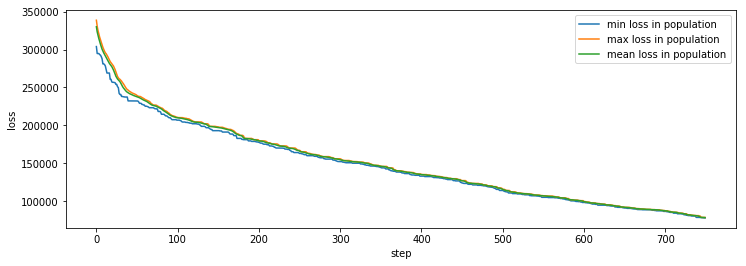

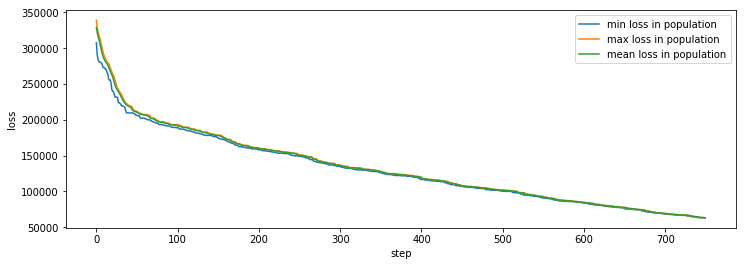

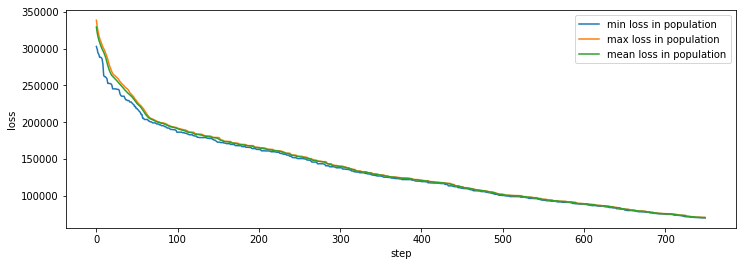

In [80]:
n, A = load_kroA200()
run_sga(times=10, chromosome_length = n, crossover=CX, number_of_iterations = 750, mutation_probability=0.4)

loss = 97326.57486760784
loss = 89961.44575834127
loss = 105104.78488507088
loss = 97875.8813645995
loss = 100170.33075284756
loss = 96012.36884211125
loss = 101934.06398206843
loss = 97323.97288608902
loss = 108461.26622917475
loss = 97891.12092301836


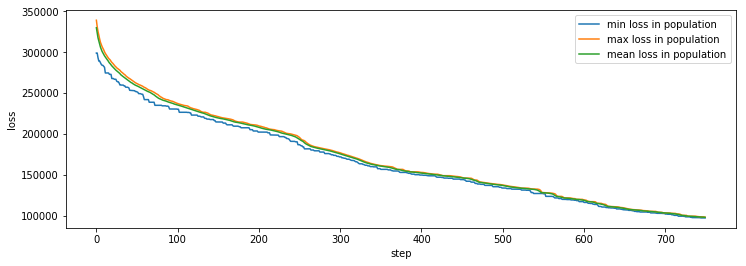

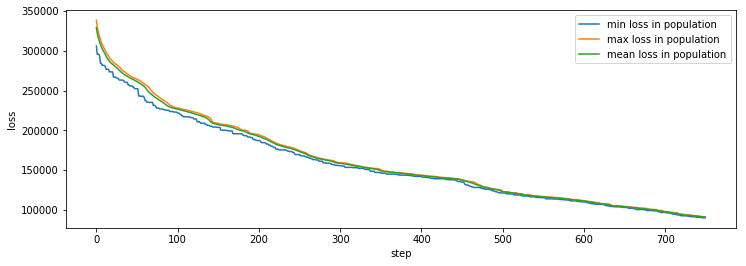

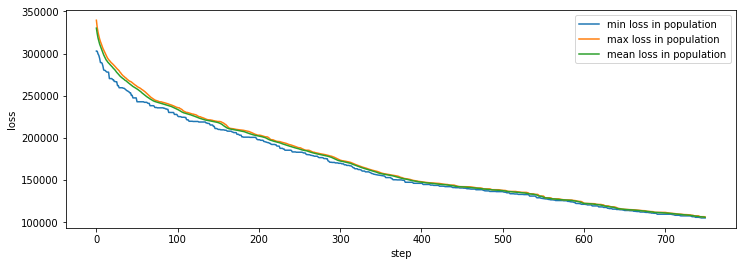

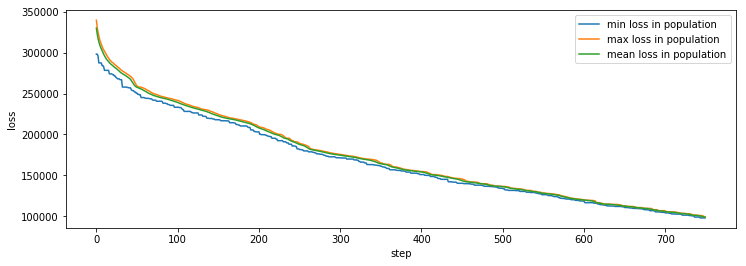

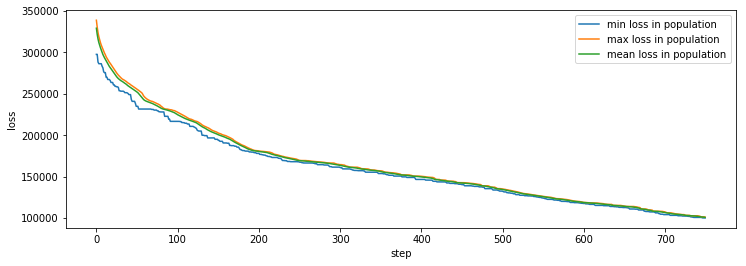

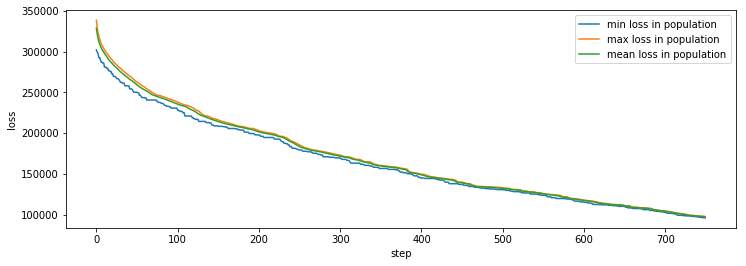

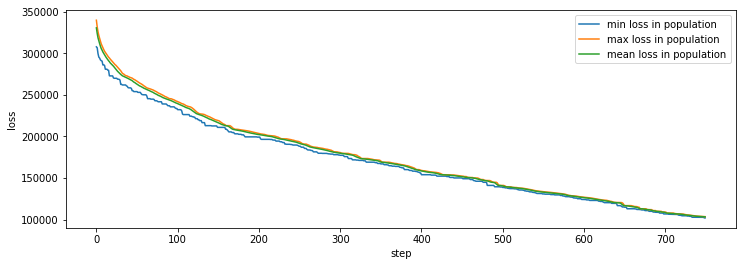

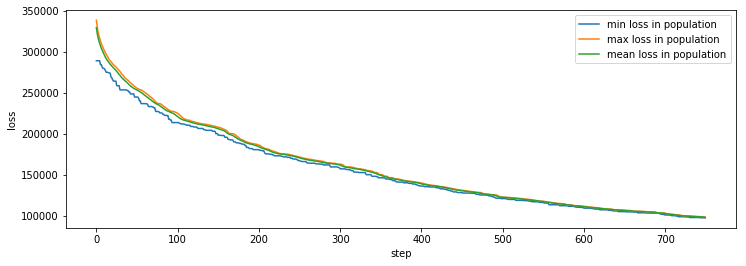

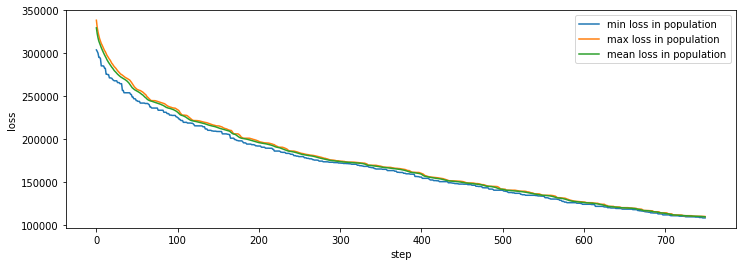

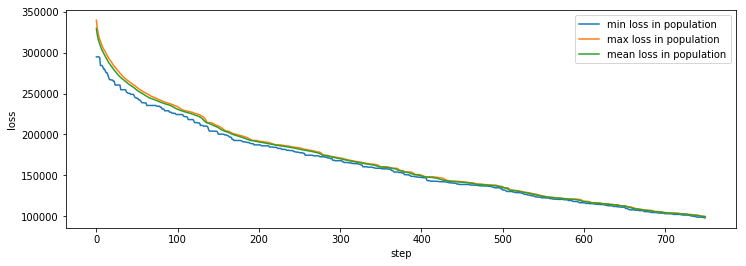

In [81]:
n, A = load_kroA200()
run_sga(times=10, chromosome_length = n, crossover=PBX, number_of_iterations = 750, mutation_probability=0.4)